# Desafio 1 - Grupo 2 

### INTEGRANTES:
### -Thomas Gomez
### -Pedro Torredo
### -Pedro Roisman
### -Segundo Rodriguez Parodi








### Objetivos del trabajo practico:

#### -Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
#### -Realizar un análisis descriptivo de las principales variables.
#### -Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

## 1) poner a tono el dataset

<p style="color:#FF0000";> Muy bien la idea de arrancar detallando los integrandes del grupo y los objetivos del trabajo. Capaz se puede mejorar un poco la estética, está muy cargado de negritas y letras grandes, no se diferencia bien los títulos del cuerpo.<p>

  ### 1.1)  Vamos a importar el dataset y ver un poco los datos

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

In [2]:
# ubicacion del dataset
data_location = 'Data/properatti.csv'

data = pd.read_csv(data_location)

#vemos el dataset como esta compuesto

data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [3]:
data.groupby(["property_type"])["surface_total_in_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3601.0,122.297417,298.387636,0.0,61.0,90.0,141.0,14742.0
apartment,51085.0,96.605873,1602.658969,0.0,43.0,59.0,87.0,200000.0
house,24505.0,507.438686,2135.548562,0.0,180.0,278.0,475.0,154438.0
store,2701.0,494.512403,2261.117146,0.0,60.0,154.0,360.0,93000.0


(0.0, 3000.0)

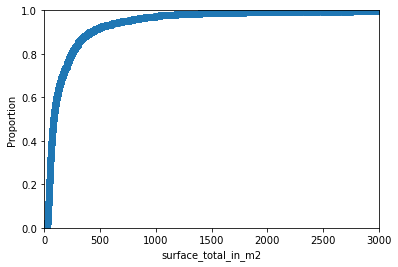

In [4]:
sns.ecdfplot(data["surface_total_in_m2"], marker="o")
plt.ylim([0,1])
plt.xlim([0,3000])

In [5]:
#vemos que cantidad de filas y columnas tiene el dataset

print ( "cantidad de filas ", data.shape[0])
print ( "cantidad de columnas ", data.shape[1])

cantidad de filas  121220
cantidad de columnas  26


In [6]:
# vemos que tipo de datos es cada columna

data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

### 1.2) vamos a seleccionar las columnas que nos interesan y borrar las filas duplicadas

- #### primeros valores eliminados (eliminados: 5.251)

#### <p style="color:#FF0000";>  No habría que incluir las columnas de texto libre al momento de identificar duplicados ya que es muy dificil que los propietarios redacten 2 veces el mismo texto.

In [7]:
#vamos a limpiar las columnas q no usamos para luego identificar los duplicados

#creamos un nuevo dataset llamado data1 y seleccionamos las columnas que queremos

data1 = data[["property_type", "place_name", "place_with_parent_names", "state_name", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_aprox_usd", "surface_total_in_m2", "surface_covered_in_m2", "price_usd_per_m2", "price_per_m2", "rooms"]]

print("antes teniamos ", data.shape[0], "filas y ", data.shape[1], "columnas")

#ahora vamos a identificar los duplicados
data1_duplicados = data1.duplicated()
print("cantidad de datos duplicados ", data1_duplicados.sum())
             
#ahora con drop duplicate vamos a eliminar los que son True y estan duplicados

data1 = data1.drop_duplicates()

print("ahora tenemos ", data1.shape[0], "filas y ", data1.shape[1], "columnas")

antes teniamos  121220 filas y  26 columnas
cantidad de datos duplicados  13196
ahora tenemos  108024 filas y  14 columnas


In [8]:
# le agregamos nuevamente la columna description al dataset

data1["description"] = data["description"]

data1.head(3)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,..."
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...


### 1.3) analizamos la cantidad de nulos que tiene el dataset

In [9]:
#ahora vamos a ver la cantidad de elementos nulos que tiene cada columna
data_nulos = data1.isnull()
cantidad_nulos = data_nulos.sum()
print("*cantidad de nulos*" , '\n')
print(cantidad_nulos, '\n')

#la idea es ver el % de nulos asi sabemos si las columnas sirven o no, o que trabajo tenemos que hacerle a cada una
cantidad_registros = data1.shape[0]
porcentaje_nulos = cantidad_nulos / cantidad_registros
print("*porcentaje de nulos*", '\n')
print(porcentaje_nulos)

*cantidad de nulos* 

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       42657
price                         14556
currency                      14557
price_aprox_local_currency    14556
price_aprox_usd               14556
surface_total_in_m2           35225
surface_covered_in_m2         16660
price_usd_per_m2              44367
price_per_m2                  26453
rooms                         63899
description                       2
dtype: int64 

*porcentaje de nulos* 

property_type                 0.000000
place_name                    0.000213
place_with_parent_names       0.000000
state_name                    0.000000
lat-lon                       0.394884
price                         0.134748
currency                      0.134757
price_aprox_local_currency    0.134748
price_aprox_usd               0.134748
surface_total_in_m2           0.326085
surface_c

### 1.4) vamos a investigar un poco ciertas columnas que nos interesan y limpiar si vemos algunos datos que no nos aportan

- #### Investigamos la columna price_aprox_usd

In [10]:
print('Tamaño columna price --->', data1['price_aprox_usd'].shape[0], '\n')
print('Valores nulos columna price --->', data1['price_aprox_usd'].isnull().sum(), '\n')
print('Valores NO nulos columna price --->', data1['price_aprox_usd'].notnull().sum(), '\n')
print(data1['price_aprox_usd'].describe())

Tamaño columna price ---> 108024 

Valores nulos columna price ---> 14556 

Valores NO nulos columna price ---> 93468 

count    9.346800e+04
mean     2.425822e+05
std      3.982586e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.479000e+05
75%      2.700000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64


- #### Investigamos la columna property_type

In [11]:
data1['property_type'].value_counts()

apartment    60535
house        38120
PH            5453
store         3916
Name: property_type, dtype: int64

- #### de las 14.556 propiedades nulas, vamos a analizar que tipo de propiedad son para entender mejor 

In [12]:
# vamos a analizar cada tipo de propiedad

price_aprox_usd = data1['price_aprox_usd']
property_type_PH = data1['property_type'] == 'PH' 
PH_price = data1.loc[property_type_PH, 'price_aprox_usd']

property_type_apartment = data1['property_type'] == 'apartment' 
apartment_price = data1.loc[property_type_apartment, 'price_aprox_usd']

property_type_house = data1['property_type'] == 'house' 
house_price = data1.loc[property_type_house, 'price_aprox_usd']

property_type_store = data1['property_type'] == 'store' 
store_price = data1.loc[property_type_store, 'price_aprox_usd']

In [13]:
#ahora imprimos la cantidad de nulos para cada tipo de propiedad 

print('Cantidad de nulos en PH --->', PH_price.isnull().sum(), '\n')
print('Cantidad de nulos en apartment --->', apartment_price.isnull().sum(), '\n')
print('Cantidad de nulos en house --->', house_price.isnull().sum(), '\n')
print('Cantidad de nulos en store --->', store_price.isnull().sum(), '\n')

Cantidad de nulos en PH ---> 405 

Cantidad de nulos en apartment ---> 6607 

Cantidad de nulos en house ---> 6747 

Cantidad de nulos en store ---> 797 



In [14]:
#ahora vemos que % de nulos tiene cada tipo de propiedad 

print('Cantidad de nulos en PH --->', PH_price.isnull().sum() / PH_price.shape[0] , '\n')
print('Cantidad de nulos en apartment --->', apartment_price.isnull().sum() / apartment_price.shape[0] , '\n')
print('Cantidad de nulos en house --->', house_price.isnull().sum() / house_price.shape[0] , '\n')
print('Cantidad de nulos en store --->', store_price.isnull().sum() / store_price.shape[0] , '\n')

Cantidad de nulos en PH ---> 0.07427104346231432 

Cantidad de nulos en apartment ---> 0.10914347071941852 

Cantidad de nulos en house ---> 0.17699370409233997 

Cantidad de nulos en store ---> 0.20352400408580185 



- #### vamos a separar en bins para ver como se agrupan por precio todas las propiedades

In [15]:
#con qcut separamos en 4 bins de misma cantidad de datos, dejando afeura los nulos

priceusd_categorias = pd.qcut(data1['price_aprox_usd'], 4)
priceusd_categorias.value_counts()

(-0.001, 90000.0]         23758
(147900.0, 270000.0]      23751
(90000.0, 147900.0]       22981
(270000.0, 46545445.0]    22978
Name: price_aprox_usd, dtype: int64

In [16]:
# vemos los valores menores a 1000 usd y cuantos son

priceusd_menor_1000 = data1['price_aprox_usd'] < 1000
priceusd_menor_1000.value_counts()

False    108023
True          1
Name: price_aprox_usd, dtype: int64

In [17]:
# buscamos ese dato menos a 1.000 usd para analizarlo

dato_menor = data1[priceusd_menor_1000]
dato_menor

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description
9761,house,Córdoba,|Argentina|Córdoba|,Córdoba,"4.5458426,-75.67893099",0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0,Casa en Venta de 2 dorm. en Armenia


- #### segundos valores elimiandos (eliminados: 1)

In [18]:
#vamos a eliminar ese dato porque no nos aporta nada ya que no tiene ni precio ni superficie (tampoco esta la info en description)

data2 = data1.drop([9761], axis = 0)
data2.shape

#data2.head(3)

(108023, 15)

In [19]:
#vemos ahora los nuevos bins q se armaron 

priceusd_categorias = pd.qcut(data2['price_aprox_usd'], 4)
priceusd_categorias.value_counts()

(4666.619, 90000.0]       23757
(147900.0, 270000.0]      23751
(90000.0, 147900.0]       22981
(270000.0, 46545445.0]    22978
Name: price_aprox_usd, dtype: int64

In [20]:
#ahora analizamos los que son mayores a 7,99mm de usd

priceusd_mayor_8m = data2['price_aprox_usd'] > 7999999
priceusd_mayor_8m.value_counts()

False    108000
True         23
Name: price_aprox_usd, dtype: int64

In [21]:
datos_mayores = data2[priceusd_mayor_8m]
datos_mayores

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description
525,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,NaN,11000000.0,USD,1.940895e+08,11000000.00,7500.0,1800.0,1466.666667,6111.111111,NaN,Total vista al rÃ­o. Sobre 7500 m2 de parque a...
11349,house,Capital Federal,|Argentina|Capital Federal|,Capital Federal,NaN,8500000.0,USD,1.499782e+08,8500000.00,7832.0,4111.0,1085.291113,2067.623449,NaN,Sobre 7832m2 de lote existen 4111m2 cubiertas ...
24548,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Capital Federal,"-34.6213421,-58.3741846",46545445.0,USD,8.212711e+08,46545445.00,200000.0,NaN,232.727225,NaN,3.0,dsdffhghvcvbcdfdfghdfhghkjhkhjklhjkfgvghfghnfg...
34638,house,Olivos,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,NaN,14000000.0,USD,2.470230e+08,14000000.00,2079.0,NaN,6734.006734,NaN,NaN,Excelente zona. Cerca de la Quinat Presidencia...
44684,apartment,Palermo Chico,|Argentina|Capital Federal|Palermo|Palermo Chico|,Capital Federal,"-34.5789246,-58.4013987",8000000.0,USD,1.411560e+08,8000000.00,410.0,410.0,19512.195122,19512.195122,5.0,CONTACTO: MARTIN PINUS 15- EXCELENTISIMA PROPI...
44685,apartment,Palermo Chico,|Argentina|Capital Federal|Palermo|Palermo Chico|,Capital Federal,"-34.5789246,-58.4013987",8500000.0,USD,1.499782e+08,8500000.00,410.0,410.0,20731.707317,20731.707317,5.0,CONTACTO: MARTIN PINUS 15- EXCELENTISIMA PROPI...
45689,house,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,"-32.933983,-60.7319772",11111111.0,USD,1.960500e+08,11111111.00,304.0,149.0,36549.707237,74571.214765,NaN,CODIGO: 2062-670 ubicado en: URQUIZA 7900 - P...
49083,house,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Río Negro,NaN,15500000.0,USD,2.734898e+08,15500000.00,NaN,NaN,NaN,NaN,NaN,CODIGO: 1092-vta-angostura ubicado en: Villa L...
55319,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,"-34.4722088,-58.4996791",9900000.0,USD,1.746806e+08,9900000.00,1000.0,1000.0,9900.000000,9900.000000,NaN,Casa importante en lote privilegiado con vista...
57907,house,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,"-34.4877803,-58.5557866",8500000.0,USD,1.499782e+08,8500000.00,NaN,4111.0,NaN,2067.623449,NaN,Sobre 7832m2 de lote existen 4111m2 cubiertas ...


- #### tercer eliminacion de valores (eliminados: 8)

In [22]:
#vamos a borrar en base a lo que vimos los sigueintes indices porque no son propiedades reales, o son errores de carga

data3 = data2.drop([24548, 91468, 107390, 91479, 91289, 91428, 114131, 45689], axis = 0)

In [23]:
data3.shape

(108015, 15)

## 2) ahora vamos a trabajar sobre las columnas de ubicacion

- ### Tenemos 3 columnas de ubicacion "place_name"   "place_with_parent_names"  "state_name"

- ### place_name no se puede utilizar como columna de Localidad ya que hay datos mal cargados, por ejemplo ciertas filas con nombres de Barrios Privados

- ### Es por eso que trabajamos la columna "place_with_parent_names", la splitiamos y obtuvimos la localidad de la misma. Esa localidad va a ser la ubicacion mas especifica para todo el trabajo 

In [24]:
#vamos a arrancar por sacar el pais Argentina ya que todas las propiedades son en Argentina.
# creamo una regex para sacar los |Argentina del comienzo de "place_with_parent_names"
import re
patron_argentina = "\|Argentina\|"
patron_regex_arg = re.compile(patron_argentina)
data3["place_with_parent_names"] = data3["place_with_parent_names"].apply(lambda x: x if x is np.NaN else patron_regex_arg.sub("",x))

#### una vez que tenemos la regex de thomas con todos los valores de m2, agregamos los datos a las dos columnas covered y total y ya podemos dividir la columna precio aprox usd por la columna final de surface que usemos para el total de la superficie. de esta manera obtenemos el verdadero valor de price per m2 REAL

In [25]:
data3.loc[:, ["place_with_parent_names"]].head(10)

,place_with_parent_names
0,Capital Federal|Mataderos|
1,Bs.As. G.B.A. Zona Sur|La Plata|
2,Capital Federal|Mataderos|
3,Capital Federal|Liniers|
4,Buenos Aires Costa Atlántica|Mar del Plata|Cen...
5,Entre Ríos|Gualeguaychú|
6,Bs.As. G.B.A. Zona Norte|Vicente López|Munro|
7,Capital Federal|Belgrano|
8,Capital Federal|Belgrano|
9,Santa Fe|Rosario|


In [26]:
#Splitiamos ahora "place_with_parent_names" en 3 columnas distintas (provincia, localidad, info extra) y las agregamos al DF

data3[["Provincia","Localidad", "Info_extra"]] = data3["place_with_parent_names"].str.split("|",n=2, expand=True)
data3.loc[:,["Provincia","Localidad", "Info_extra"]]

,Provincia,Localidad,Info_extra
0,Capital Federal,Mataderos,
1,Bs.As. G.B.A. Zona Sur,La Plata,
2,Capital Federal,Mataderos,
3,Capital Federal,Liniers,
4,Buenos Aires Costa Atlántica,Mar del Plata,Centro|
...,...,...,...
121214,Bs.As. G.B.A. Zona Norte,San Isidro,
121215,Capital Federal,Belgrano,
121216,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar|
121217,Capital Federal,Villa Urquiza,


In [27]:
data3.head(5)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,Provincia,Localidad,Info_extra
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",Capital Federal,Mataderos,
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,Bs.As. G.B.A. Zona Sur,La Plata,
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,Capital Federal,Mataderos,
3,PH,Liniers,Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,Capital Federal,Liniers,
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Cen...,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,Buenos Aires Costa Atlántica,Mar del Plata,Centro|


In [28]:
#Creamos un nuevo DF con las 3 columnas del df original y con las columnas spliteadas para comparar la info de todas las columnas.

chequeo_data_frame = data3.loc[:,["state_name", "place_name", "place_with_parent_names", "Provincia", "Localidad", "Info_extra"]]
chequeo_data_frame.shape

(108015, 6)

In [29]:
#Creamos una mascara para aquellas propiedades sin Localidad(columna Localidad en blanco) para ver si podemos completar la localidad con la info de las otras columnas.

mask_propiedades_sin_localidad = data3["Localidad"] == ""

#Para corroborar, creamos un DF con aquellas propiedades sin localidad y comparamos las columnas. 
prop_sin_localidad = chequeo_data_frame.loc[mask_propiedades_sin_localidad,:]
prop_sin_localidad

,state_name,place_name,place_with_parent_names,Provincia,Localidad,Info_extra
108,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
110,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
115,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
119,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
121,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
...,...,...,...,...,...,...
121200,Córdoba,Córdoba,Córdoba|,Córdoba,,None
121202,Córdoba,Córdoba,Córdoba|,Córdoba,,None
121203,Córdoba,Córdoba,Córdoba|,Córdoba,,None
121205,Córdoba,Córdoba,Córdoba|,Córdoba,,None


In [30]:
#Con estas igualdades chequeamos que las columnas tienen la misma info y que no podemos obtener info adicional para completar la localidad de ciertas propiedas.

#son un total de 3.918 propiedades sin localidad.

print((prop_sin_localidad["place_name"] == prop_sin_localidad["Provincia"]).all())
print((prop_sin_localidad["state_name"] == prop_sin_localidad["Provincia"]).all())

True
True


In [31]:
#chequeamos si hay propiedades que al haber spliteado "place_with_parent_names" hayan quedado con misma Provincia y Localidad.

print((data3["Provincia"] != data3["Localidad"]).all())

mask_misma_prov_y_localidad = data3["Provincia"] == data3["Localidad"]

print(mask_misma_prov_y_localidad.value_counts())

data3.loc[mask_misma_prov_y_localidad, ["state_name", "place_name", "place_with_parent_names", "Provincia", "Localidad", "Info_extra"]]


#hay 6.629 otras propiedades que tienen misma Provincia y Localidad, es decir que no cuentan con Localidad. 
#Total de 10.547 propiedades que no cuentan con Localidad especifica, unicamente provincia.

False
False    101386
True       6629
dtype: int64


,state_name,place_name,place_with_parent_names,Provincia,Localidad,Info_extra
10,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
32,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
87,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
88,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
89,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
...,...,...,...,...,...,...
120685,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120966,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120971,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120979,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,


- ### obtuvimos 3.918 propiedades con la columna "localidad" vacia, y 6.629 que tienen en la columna "localidad" la provincia

In [32]:
#vamos a eliminar esos datos porque creemos fundamental para el analisis tener la localidad del la propiedad. empezamos por los 7.421 que tienen la povincia en la localidad

data3["surface_para_eliminar_prov"] = mask_misma_prov_y_localidad

data4 = data3.drop(data3[data3['surface_para_eliminar_prov']==True].index)

data4.shape

(101386, 19)

- #### vamos a borrar esas propiedades que no tienen localidad o la localidad es igual a la provincia

In [33]:
#ahora vamos a borrar los q estan vacios en localidad

data4["surface_para_eliminar_vacios"] = mask_propiedades_sin_localidad

data5 = data4.drop(data4[data4['surface_para_eliminar_vacios']==True].index)

data5.shape

(97468, 20)

In [34]:
# chequeamos que la columna "Localida" no tenga data vacia

mask_check_sin_localidad = data5["Localidad"] == ""
prop_mask_check_sin_localidad = data5.loc[mask_propiedades_sin_localidad,:]
print(prop_mask_check_sin_localidad.shape)

# chequeamos que la columna "Localida" no tenga igualdad con "Provincia" (tiene q darnos False)

mask_check_prov_y_localidad = data5["Provincia"] == data5["Localidad"]
print(mask_check_prov_y_localidad.value_counts())

(0, 20)
False    97468
dtype: int64


In [35]:
# chequeamos que localidad o provincian tengan nulos

print(data5.isnull().sum())

property_type                       0
place_name                         23
place_with_parent_names             0
state_name                          0
lat-lon                         37004
price                           12294
currency                        12294
price_aprox_local_currency      12294
price_aprox_usd                 12294
surface_total_in_m2             30008
surface_covered_in_m2           13815
price_usd_per_m2                38004
price_per_m2                    22229
rooms                           56932
description                         2
Provincia                           0
Localidad                           0
Info_extra                          0
surface_para_eliminar_prov          0
surface_para_eliminar_vacios        0
dtype: int64


In [36]:
#nos quedaron varias columnas que creamos para limpar el dataset y ahora las vamos a borrar

data6 = data5.drop(["surface_para_eliminar_prov","surface_para_eliminar_vacios"], axis = 1)

In [37]:
data6.head()

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,Provincia,Localidad,Info_extra
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",Capital Federal,Mataderos,
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,Bs.As. G.B.A. Zona Sur,La Plata,
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,Capital Federal,Mataderos,
3,PH,Liniers,Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,Capital Federal,Liniers,
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Cen...,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,Buenos Aires Costa Atlántica,Mar del Plata,Centro|


In [38]:
# chequeamos las columnas que quedaron
print(data6.isnull().sum())

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       37004
price                         12294
currency                      12294
price_aprox_local_currency    12294
price_aprox_usd               12294
surface_total_in_m2           30008
surface_covered_in_m2         13815
price_usd_per_m2              38004
price_per_m2                  22229
rooms                         56932
description                       2
Provincia                         0
Localidad                         0
Info_extra                        0
dtype: int64


- ### ahora chequeamos si hay vacios en la columna provincia

In [39]:
# vemos si hay nulos en la columna "provincia" creando una mascara

mask_provincia_vacio = data6["Provincia"] == ""

prop_sin_provincia = data6.loc[mask_provincia_vacio,:]
print(prop_sin_provincia.shape)

(0, 18)


### finamente cosneguimos que todas las propiedades tengan una localidad

In [40]:
#cuantos datos tenemos ahora en data6?

print(data6.shape)
print(data6.isnull().sum())

(97468, 18)
property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       37004
price                         12294
currency                      12294
price_aprox_local_currency    12294
price_aprox_usd               12294
surface_total_in_m2           30008
surface_covered_in_m2         13815
price_usd_per_m2              38004
price_per_m2                  22229
rooms                         56932
description                       2
Provincia                         0
Localidad                         0
Info_extra                        0
dtype: int64


### Analizamos aquellas localidades con pocas propiedades y las eliminamos del data set

In [41]:
#Analizamos cantidad de provincias y localidades
data6.loc[:,["Provincia","Localidad"]].describe()

,Provincia,Localidad
count,97468,97468
unique,27,528
top,Capital Federal,Tigre
freq,28022,7900


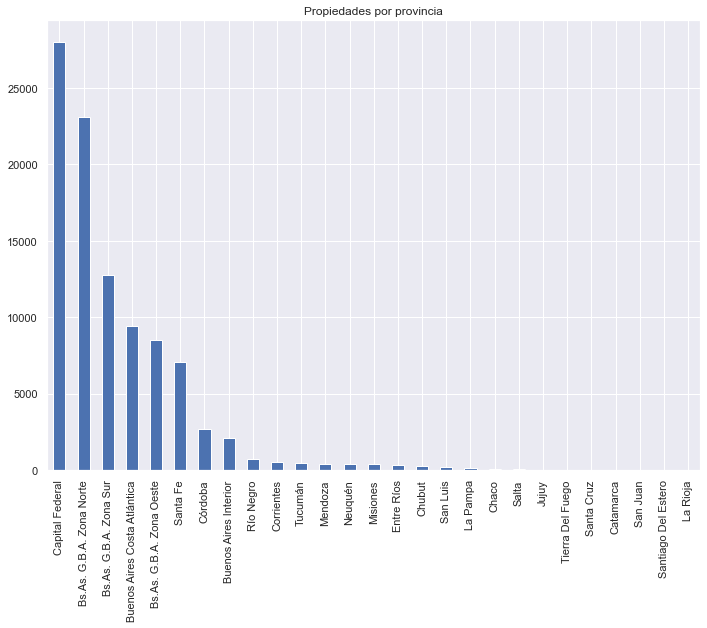

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = data6['Provincia'].value_counts().plot(kind='bar',
                                            title='Propiedades por provincia')

In [43]:
#En ciertas provincias contamos con muy pocas propiedades, con lo cual no nos sirven para el modelo.
data6["Provincia"].value_counts()

Capital Federal                 28022
Bs.As. G.B.A. Zona Norte        23084
Bs.As. G.B.A. Zona Sur          12751
Buenos Aires Costa Atlántica     9438
Bs.As. G.B.A. Zona Oeste         8524
Santa Fe                         7039
Córdoba                          2660
Buenos Aires Interior            2092
Río Negro                         727
Corrientes                        487
Tucumán                           440
Mendoza                           397
Neuquén                           388
Misiones                          357
Entre Ríos                        340
Chubut                            232
San Luis                          162
La Pampa                          131
Chaco                              54
Salta                              34
Jujuy                              25
Tierra Del Fuego                   25
Santa Cruz                         20
Catamarca                          19
San Juan                           18
Santiago Del Estero                 1
La Rioja    

In [44]:
#Creamos un data frame con localidades ordenadas por numero de propiedades
localidades = pd.value_counts(data6.Localidad).to_frame().reset_index()
localidades = localidades.rename(columns={"index":"localidad", "Localidad":"numero propiedades"})
localidades.head(5)

,localidad,numero propiedades
0,Tigre,7900
1,Mar del Plata,7204
2,Rosario,6080
3,Palermo,3717
4,Vicente López,3350


In [45]:
localidades.describe()

,numero propiedades
count,528.000000
mean,184.598485
std,694.004204
min,1.000000
25%,1.000000
50%,6.000000
75%,51.250000
max,7900.000000


In [46]:
#Creo una mascara para localidades con menos de 50 propiedades
mask_menores_100 = localidades["numero propiedades"] < 50
localidades_a_borrar = localidades[mask_menores_100]
localidades_a_borrar

,localidad,numero propiedades
134,Capitán Bermúdez,49
135,Cañuelas,48
136,San Clemente del Tuyú,48
137,Trenque Lauquen,46
138,Villa General Mitre,45
...,...,...
523,San Javier/Yacanto,1
524,Laguna Paiva,1
525,Toledo,1
526,Arroyo Ceibal,1


In [47]:
print("cantidad de propiedades: ", localidades["numero propiedades"].sum())
print("propiedades a borrar: ", localidades_a_borrar["numero propiedades"].sum())

cantidad de propiedades:  97468
propiedades a borrar:  3011


In [48]:
data6["Localidad"]

0             Mataderos
1              La Plata
2             Mataderos
3               Liniers
4         Mar del Plata
              ...      
121213       San Isidro
121214       San Isidro
121215         Belgrano
121216       San Isidro
121217    Villa Urquiza
Name: Localidad, Length: 97468, dtype: object

In [49]:
#Creo una lista con aquellas localidades a borrar
lista_localidades = list(localidades_a_borrar["localidad"])
lista_localidades

['Capitán Bermúdez',
 'Cañuelas',
 'San Clemente del Tuyú',
 'Trenque Lauquen',
 'Villa General Mitre',
 'Escalante',
 'Luján de Cuyo',
 'Florencio Varela',
 'San Pedro',
 'Santa Teresita',
 'Parque Chas',
 'Agronomía',
 'Villa La Angostura',
 'Velez Sarsfield',
 'Villa Real',
 'Coronda',
 'Reconquista',
 'Río Ceballos',
 'Resistencia',
 'Granadero Baigorria',
 'San Miguel del Monte',
 'Brandsen',
 'Mar Azul',
 'Unquillo',
 'Trelew',
 'Las Heras',
 'Necochea',
 'Concordia',
 'Cipolletti',
 'Berisso',
 'Los Reartes',
 'Mar del Tuyú',
 'Maipú',
 'Campana',
 'Mercedes',
 'Oncativo',
 'San Salvador de Jujuy',
 'Villa del Dique',
 'Exaltación de la Cruz',
 'Ensenada',
 'San Francisco',
 'Iriondo',
 'Río Tercero',
 'Villa Constitución',
 'Las Toninas',
 'Oberá',
 'Alta Gracia',
 'Tafí del Valle',
 'Santa Clara del Mar',
 'Tanti',
 'Claromecó',
 'Río Grande',
 'San Antonio de Arredondo',
 'Mina Clavero',
 'Azul',
 'Jesús María',
 'General Madariaga',
 'Ibarlucea',
 'Punta Indio',
 'Puerto Mad

In [50]:
data6["Localidad"] = data6["Localidad"].apply(lambda x: np.NaN if x in lista_localidades else x)

In [51]:
data6["Localidad"].unique()

array(['Mataderos', 'La Plata', 'Liniers', 'Mar del Plata', nan,
       'Vicente López', 'Belgrano', 'Rosario', 'San Miguel', 'San Isidro',
       'Palermo', 'Tigre', 'General Rodríguez', 'Pilar', 'Morón',
       'Flores', 'Boedo', 'Las Cañitas', 'Villa Carlos Paz',
       'Puerto Madero', 'Balvanera', 'Escobar', 'Caballito', 'Nuñez',
       'Berazategui', 'General San Martín', 'Ituzaingó', 'Posadas',
       'Tres de Febrero', 'San Bernardo', 'San Telmo', 'Almagro',
       'San Fernando', 'Pinamar', 'Colón', 'Luján', 'San Lorenzo',
       'La Matanza', 'Lanús', 'Punilla', 'Villa Gesell',
       'Lomas de Zamora', 'Colegiales', 'Floresta', 'Quilmes',
       'Confluencia', 'General Roca', 'Barrio Norte', 'Barracas',
       'Villa Allende', 'Lobos', 'San Martín de los Andes', 'Recoleta',
       'Congreso', 'Villa Crespo', 'Chacarita', 'Constitución',
       'Villa Urquiza', 'Merlo', 'José C Paz', 'Saavedra', 'Monserrat',
       'Santo Tomé', 'Pompeya', 'Bahía Blanca', 'San Carlos de Baril

In [52]:
data6["Localidad"].isnull().sum()

3011

In [53]:
#eliminamos aquellas localidades con menos de 50 propiedads
data6.dropna(subset=["Localidad"],inplace=True)

In [54]:
#Chequeamos los nulos
data6["Localidad"].isnull().sum()

0

In [55]:
#cantidad de propiedades restantes
data6.shape

(94457, 18)

In [56]:
data6.isnull().sum()

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       36174
price                         11276
currency                      11276
price_aprox_local_currency    11276
price_aprox_usd               11276
surface_total_in_m2           28636
surface_covered_in_m2         12995
price_usd_per_m2              36105
price_per_m2                  20796
rooms                         55231
description                       2
Provincia                         0
Localidad                         0
Info_extra                        0
dtype: int64

## 3)  La clave esta en la columna price per m2 en usd, por eso vamos a enfocarnos ahora en tener la mayor cantidad de datos posibles en esa columna

### 3.1) Arrancamos con la parte de Superficie
- #### vamos tratar de completar los valores que faltan entre las columnas surface total y surface covered

In [57]:
#analizamos superficie total por tipo de propiedad
data6.groupby("property_type")["surface_total_in_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3078.0,122.043535,183.372792,0.0,64.0,96.0,149.75,9000.0
apartment,39804.0,82.703849,369.534506,0.0,43.0,60.0,90.00,49800.0
house,20740.0,455.432690,1117.247908,0.0,183.0,277.0,460.00,50000.0
store,2199.0,470.959072,2366.619152,0.0,58.5,150.0,360.00,93000.0


In [58]:
#analizamos superfice total por tipo de propiedad
data6.groupby("property_type")["surface_covered_in_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4237.0,89.096531,148.171402,1.0,53.0,75.0,105.0,6610.0
apartment,47134.0,76.430369,902.268287,0.0,40.0,53.0,78.0,187000.0
house,27554.0,217.956921,417.102078,1.0,120.0,180.0,260.0,38240.0
store,2537.0,403.578636,1573.764264,1.0,40.0,111.0,300.0,35000.0


In [59]:
# vemos cantidad de nulos en cada columna
print("nulos en superficie total:", data6["surface_total_in_m2"].isnull().sum())
print("nulos en superficie cubierta:", data6["surface_covered_in_m2"].isnull().sum())

nulos en superficie total: 28636
nulos en superficie cubierta: 12995


In [60]:
# vemos cuantos valores tenemos en 0 para la columna surface total 

ceros_total_surface = data6['surface_total_in_m2'] == 0
print(ceros_total_surface.value_counts())

False    94165
True       292
Name: surface_total_in_m2, dtype: int64


In [61]:
# vemos cuantos valores tenemos en 0 para la columna surface covered 

ceros_covered_surface = data6['surface_covered_in_m2'] == 0
print(ceros_covered_surface.value_counts())

False    94455
True         2
Name: surface_covered_in_m2, dtype: int64


In [62]:
#cambiamos los valores .NaN por ceros que se suman a la lista de ceros ya existente

data6['total_en_zeros'] = data6['surface_total_in_m2'].fillna(0)
data6['covered_en_zeros'] = data6['surface_covered_in_m2'].fillna(0)

In [63]:
#vemos la cantidad de 0 que tienen ahora la columna total surface

ceros_total_mask = data6['total_en_zeros'] == 0
ceros_total_mask.value_counts()

ceros_total_print = data6[ceros_total_mask]
print('la cantidad de ceros que tiene la coluna surface_total es ',ceros_total_print.shape[0])

la cantidad de ceros que tiene la coluna surface_total es  28928


In [64]:
#vemos la cantidad de 0 que tienen ahora la columna covered surface

ceros_covered_mask = data6['covered_en_zeros'] == 0
ceros_covered_mask.value_counts()

ceros_covered_print = data6[ceros_covered_mask]
print('la cantidad de ceros que tiene la coluna surface_covered es ',ceros_covered_print.shape[0])

la cantidad de ceros que tiene la coluna surface_covered es  12997


In [65]:
#vamos a ver una description de cada columna 

print(data6["covered_en_zeros"].describe(), '\n')

print(data6["total_en_zeros"].describe(), '\n')


count     94457.000000
mean        116.554993
std         729.639226
min           0.000000
25%          36.000000
50%          65.000000
75%         138.000000
max      187000.000000
Name: covered_en_zeros, dtype: float64 

count    94457.000000
mean       149.792043
std        703.332492
min          0.000000
25%          0.000000
50%         54.000000
75%        140.000000
max      93000.000000
Name: total_en_zeros, dtype: float64 



- #### vamos a calcular los valores que tienen 0 en las dos columnas

In [66]:
mask_covered_ceros = data6["covered_en_zeros"] == 0
mask_total_ceros = data6["total_en_zeros"] == 0

mask_ambas_columnas_cero = data6[data6.covered_en_zeros.isin(mask_covered_ceros) &~ data6.total_en_zeros.isin(mask_total_ceros)]

mask_ambas_columnas_cero.shape

print('la cantidad de ceros en ambas columnas es ',mask_ambas_columnas_cero.shape[0])

la cantidad de ceros en ambas columnas es  5142


In [67]:
#correcion de cantidad de ceros en ambas columnas
mask_las_dos = mask_covered_ceros & mask_total_ceros
data6.loc[mask_las_dos, ["covered_en_zeros","total_en_zeros"]]

,covered_en_zeros,total_en_zeros
1,0.0,0.0
3,0.0,0.0
9,0.0,0.0
11,0.0,0.0
65,0.0,0.0
...,...,...
121062,0.0,0.0
121069,0.0,0.0
121070,0.0,0.0
121079,0.0,0.0


- #### esto equivale a que % de ceros en cada columna?

In [68]:
(mask_covered_ceros & mask_total_ceros).sum()/data6.shape[0]

0.08395354499931186

In [69]:
# para la columna covered es:

porcentaje_ambos_ceros_covered = mask_ambas_columnas_cero.shape[0]/ceros_covered_print.shape[0]
porcentaje_ambos_ceros_covered

0.3956297607140109

In [70]:
# para la columna total es:

porcentaje_ambos_ceros_total = mask_ambas_columnas_cero.shape[0]/ceros_total_print.shape[0]
porcentaje_ambos_ceros_total

0.1777516592920354

<p style="color:#FF0000";> Ojo que están mal las cuentas acá, el denominador debería ser el total del data set, no ese recorte
    
    mask_total_ceros.sum()/data6.shape[0]
    mask_covered_ceros.sum()/data6.shape[0]


- #### por lo que vimos, la columna covered esta mucho mas completa que la de total surface. Pero tenemos datos que esten en covered pero no en total? 

In [71]:
# vamos a caluclar los valores con un 1 q tienen valor en total pero no tienen valot en covered

covered_vs_total = data6.apply(lambda x : 1 if x['total_en_zeros']!= 0 and x['covered_en_zeros'] == 0 else 0, axis=1)
covered_vs_total.value_counts()

0    89390
1     5067
dtype: int64

##### *lo que estamos diciendo aca es que, de un total de 0s de 12.997 en la columna covered_surface, vamos a tener q imputar valores a 5.067 datos, osea que al final me tienen que quedar 7.930 datos con 0, esto previo a sacar los outliers*

In [72]:
# vamos a caluclar los valores con un 1 q tienen valor covered pero no tienen valot en total

covered_vs_total_1 = data6.apply(lambda x : 1 if x['total_en_zeros']== 0 and x['covered_en_zeros'] != 0 else 0, axis=1)
covered_vs_total_1.value_counts()

0    73459
1    20998
dtype: int64

##### *lo que estamos diciendo aca es que, de un total de 0s de 28.928 en la columna total_surface, vamos a tener q imputar valores a 20.998 datos, osea que al final me tienen que quedar 7.930 datos con 0*

- #### ahora vamos a crear un ratio que me diga los m2 totales sobre m2 cubiertos para cada tipo de propiedad. Luego vamos a aplicar ese ratio a los valores que completemos 

In [73]:
#vemos los tipos de propiedad y la cantidad q tiene cada una

data6.property_type.value_counts(dropna = False)

apartment    53821
house        32329
PH            4996
store         3311
Name: property_type, dtype: int64

<p style="color:#FF0000";> Sacamos outliers antes de aplicar los ratios.<p>
 

In [74]:
#creamos nuevo dataset para hacer el cálculo de los ratios de tipo de propiedad
data_ratio = data6
data_ratio.head(2)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,Provincia,Localidad,Info_extra,total_en_zeros,covered_en_zeros
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",Capital Federal,Mataderos,,55.0,40.0
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,Bs.As. G.B.A. Zona Sur,La Plata,,0.0,0.0


In [75]:
#Creamos una funcion para eliminar outliers
def calculo_outliers_superficie(serie):
    q3 = serie.quantile(0.75)
    q1 = serie.quantile(0.25)
    iqr = q3 - q1 
    ls = q3 + iqr * 1.5
    li = q1 - iqr * 1.5
    outlier_mask = (serie < li) | (serie > ls)
    serie[outlier_mask] = np.NaN
    return serie

In [76]:
data6.isnull().sum()

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       36174
price                         11276
currency                      11276
price_aprox_local_currency    11276
price_aprox_usd               11276
surface_total_in_m2           28636
surface_covered_in_m2         12995
price_usd_per_m2              36105
price_per_m2                  20796
rooms                         55231
description                       2
Provincia                         0
Localidad                         0
Info_extra                        0
total_en_zeros                    0
covered_en_zeros                  0
dtype: int64

In [77]:
#### aplicamos la función para surface total y surface covered base tipo de propiedad y provincia
data_ratio["surface_total_ratio"] = data_ratio.groupby(['property_type', "Localidad"])['surface_total_in_m2'].apply(lambda x : calculo_outliers_superficie(x))
data_ratio["surface_covered_ratio"] = data_ratio.groupby(['property_type', "Localidad"])['surface_covered_in_m2'].apply(lambda x : calculo_outliers_superficie(x))

In [78]:
data_ratio.isnull().sum()

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       36174
price                         11276
currency                      11276
price_aprox_local_currency    11276
price_aprox_usd               11276
surface_total_in_m2           28636
surface_covered_in_m2         12995
price_usd_per_m2              36105
price_per_m2                  20796
rooms                         55231
description                       2
Provincia                         0
Localidad                         0
Info_extra                        0
total_en_zeros                    0
covered_en_zeros                  0
surface_total_ratio           32959
surface_covered_ratio         17688
dtype: int64

(0.0, 3000.0)

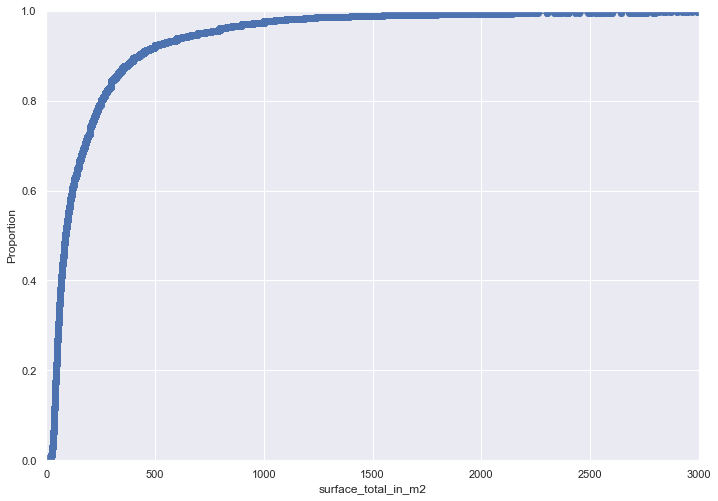

In [79]:
# vemos que con el calculo de outliers podemos identificara 4.323 en total y 4.693 en covered
# vamos a chequar las acumulada para antes y dsp de total

sns.ecdfplot(data6["surface_total_in_m2"], marker="o")
plt.ylim([0,1])
plt.xlim([0,3000])


(0.0, 3000.0)

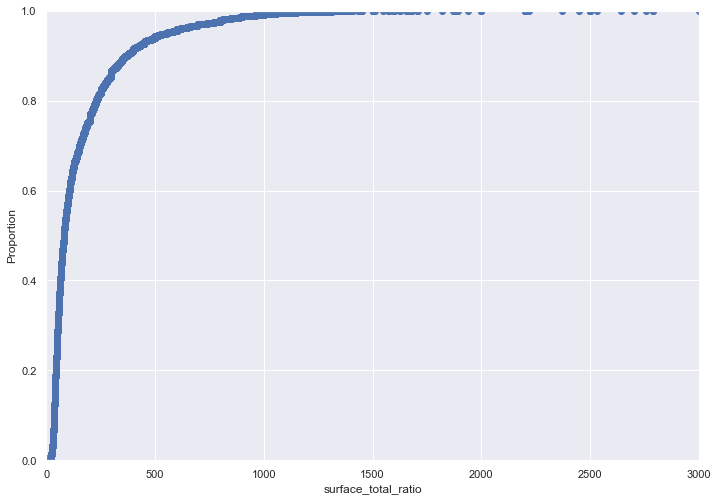

In [80]:
sns.ecdfplot(data_ratio["surface_total_ratio"], marker="o")
plt.ylim([0,1])
plt.xlim([0,3000])

(0.0, 40.0)

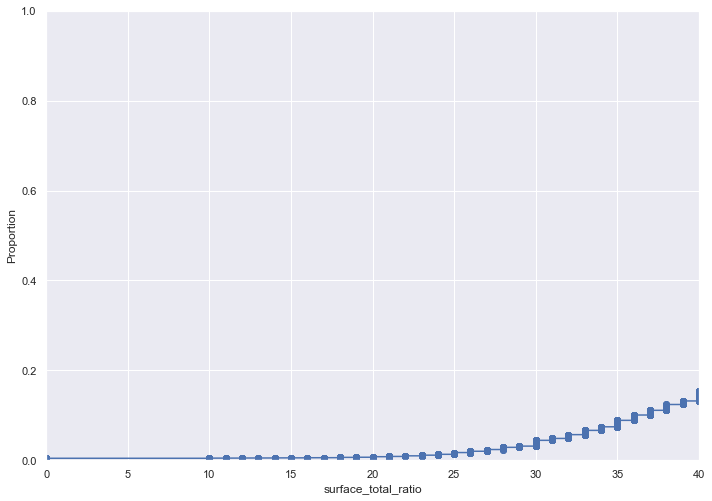

In [81]:
sns.ecdfplot(data_ratio["surface_total_ratio"], marker="o")
plt.ylim([0,1])
plt.xlim([0,40])

In [82]:
#como vemos, me sigue sin eliminar esos valores que estan por arriba de 1.500 m2, asique los vamos a sacar sin la foruma

mask_mayores_1500 = data_ratio["surface_total_ratio"] > 1500 
mask_menores_20 = data_ratio["surface_total_ratio"] < 20

print("hay ", mask_mayores_1500.sum(), " propiedades con superficie total mayor a 1500 m2")
print("hay ",mask_menores_20.sum(), " propiedades con superficie total menor a 20 m2")


hay  63  propiedades con superficie total mayor a 1500 m2
hay  419  propiedades con superficie total menor a 20 m2


In [83]:
data_ratio["columna_total_ratio_outliers"] = data_ratio["surface_total_ratio"].apply(lambda x: np.nan if x > 1500 else x)

data_ratio.isnull().sum()

property_type                       0
place_name                         23
place_with_parent_names             0
state_name                          0
lat-lon                         36174
price                           11276
currency                        11276
price_aprox_local_currency      11276
price_aprox_usd                 11276
surface_total_in_m2             28636
surface_covered_in_m2           12995
price_usd_per_m2                36105
price_per_m2                    20796
rooms                           55231
description                         2
Provincia                           0
Localidad                           0
Info_extra                          0
total_en_zeros                      0
covered_en_zeros                    0
surface_total_ratio             32959
surface_covered_ratio           17688
columna_total_ratio_outliers    33022
dtype: int64

(0.0, 1.0)

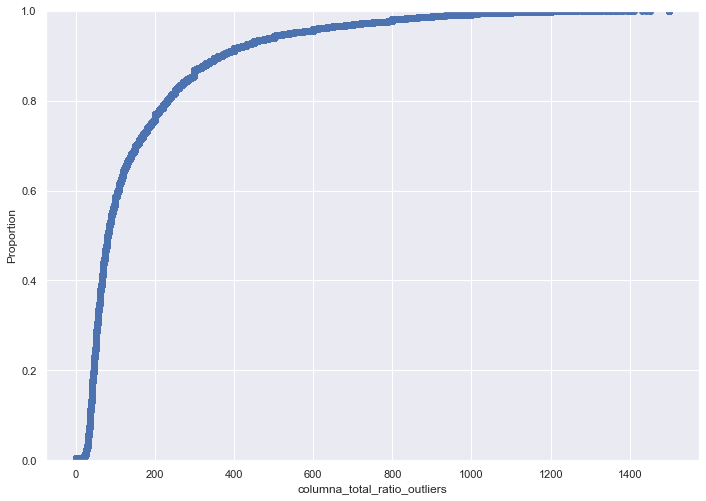

In [84]:
sns.ecdfplot(data_ratio["columna_total_ratio_outliers"], marker="o")
plt.ylim([0,1])
#plt.xlim([0,40])

In [85]:
data_ratio["columna_total_ratio_outliers_2"] = data_ratio["columna_total_ratio_outliers"].apply(lambda x: np.nan if x < 20 else x)

data_ratio.isnull().sum()

property_type                         0
place_name                           23
place_with_parent_names               0
state_name                            0
lat-lon                           36174
price                             11276
currency                          11276
price_aprox_local_currency        11276
price_aprox_usd                   11276
surface_total_in_m2               28636
surface_covered_in_m2             12995
price_usd_per_m2                  36105
price_per_m2                      20796
rooms                             55231
description                           2
Provincia                             0
Localidad                             0
Info_extra                            0
total_en_zeros                        0
covered_en_zeros                      0
surface_total_ratio               32959
surface_covered_ratio             17688
columna_total_ratio_outliers      33022
columna_total_ratio_outliers_2    33441
dtype: int64

(0.0, 1.0)

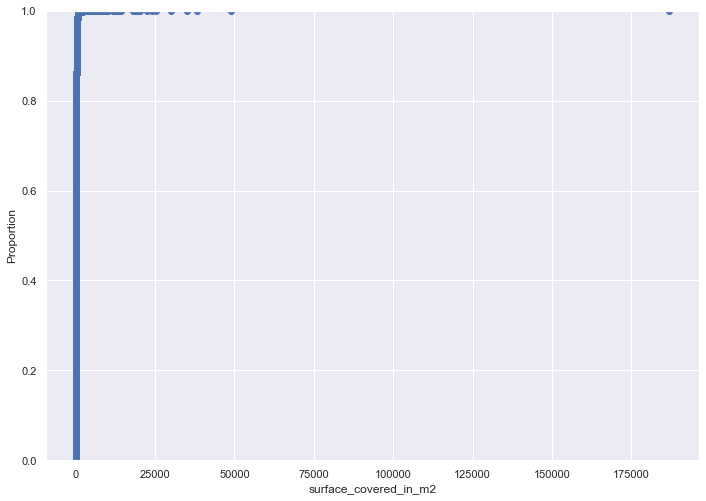

In [86]:
sns.ecdfplot(data6["surface_covered_in_m2"], marker="o")
plt.ylim([0,1])
#plt.xlim([0,900])

(0.0, 900.0)

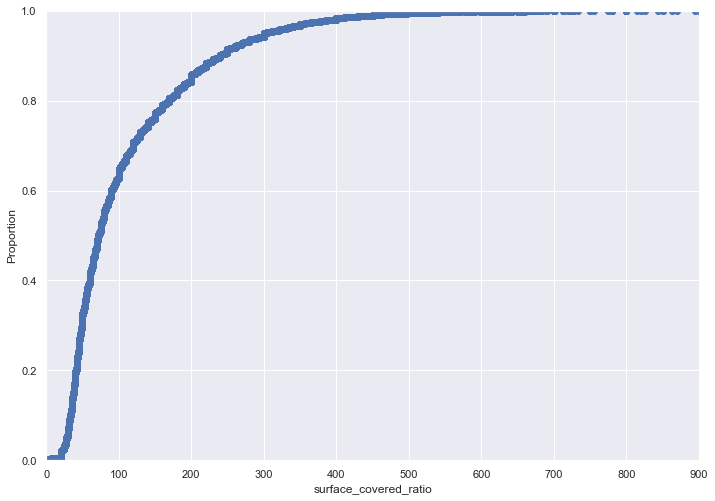

In [87]:
sns.ecdfplot(data_ratio["surface_covered_ratio"], marker="o")
plt.ylim([0,1])
plt.xlim([0,900])

In [88]:
#hacemos lo mismo con la columna covered 

mask_mayores_500_covered = data_ratio["surface_covered_ratio"] > 500 
mask_menores_20_covered = data_ratio["surface_covered_ratio"] < 20

print("hay ", mask_mayores_500_covered.sum(), " propiedades con superficie covered mayor a 500 m2")
print("hay ",mask_menores_20_covered.sum(), " propiedades con superficie covered menor a 20 m2")

hay  393  propiedades con superficie covered mayor a 500 m2
hay  473  propiedades con superficie covered menor a 20 m2


In [89]:
data_ratio["columna_covered_ratio_outliers"] = data_ratio["surface_covered_ratio"].apply(lambda x: np.nan if x > 500 else x)

data_ratio.isnull().sum()

property_type                         0
place_name                           23
place_with_parent_names               0
state_name                            0
lat-lon                           36174
price                             11276
currency                          11276
price_aprox_local_currency        11276
price_aprox_usd                   11276
surface_total_in_m2               28636
surface_covered_in_m2             12995
price_usd_per_m2                  36105
price_per_m2                      20796
rooms                             55231
description                           2
Provincia                             0
Localidad                             0
Info_extra                            0
total_en_zeros                        0
covered_en_zeros                      0
surface_total_ratio               32959
surface_covered_ratio             17688
columna_total_ratio_outliers      33022
columna_total_ratio_outliers_2    33441
columna_covered_ratio_outliers    18081


In [90]:
data_ratio["columna_covered_ratio_outliers_2"] = data_ratio["columna_covered_ratio_outliers"].apply(lambda x: np.nan if x < 20 else x)

data_ratio.isnull().sum()

property_type                           0
place_name                             23
place_with_parent_names                 0
state_name                              0
lat-lon                             36174
price                               11276
currency                            11276
price_aprox_local_currency          11276
price_aprox_usd                     11276
surface_total_in_m2                 28636
surface_covered_in_m2               12995
price_usd_per_m2                    36105
price_per_m2                        20796
rooms                               55231
description                             2
Provincia                               0
Localidad                               0
Info_extra                              0
total_en_zeros                          0
covered_en_zeros                        0
surface_total_ratio                 32959
surface_covered_ratio               17688
columna_total_ratio_outliers        33022
columna_total_ratio_outliers_2    

In [91]:
#vamos a usar las columnas "columna_total_ratio_outliers_2" para total y "columna_covered_ratio_outliers_2" para covered


In [92]:
#Creamos función para hacer el promedio de total vs covered según el tipo de propiedad

def average_in(prop):
    property_type = data_ratio['property_type'] == prop
    average_type = data_ratio[property_type]
    average = average_type.apply(lambda x : np.nan if x['columna_total_ratio_outliers_2'] == 0 or x['columna_covered_ratio_outliers_2'] == 0 else x['columna_total_ratio_outliers_2']/x['columna_covered_ratio_outliers_2'], axis = 1)
    return average.mean()

ap = 'apartment'
ho = 'house'
ph = 'PH'
st = 'store'

ratio_ap = average_in(ap)
ratio_ho = average_in(ho)
ratio_ph = average_in(ph)
ratio_st = average_in(st)

print('Ratio Apartment:', ratio_ap)
print('Ratio House:', ratio_ho)
print('Ratio PH:', ratio_ph)
print('Ratio Store:', ratio_st)

Ratio Apartment: 1.144259845724867
Ratio House: 1.882512503585138
Ratio PH: 1.322551726775843
Ratio Store: 1.140114236049086


In [93]:
data_ratio['total_zeros_sin_out'] = data_ratio['columna_total_ratio_outliers_2'].fillna(0)
data_ratio['covered_zeros_sin_out'] = data_ratio["columna_covered_ratio_outliers_2"].fillna(0)

In [94]:
data_ratio.isnull().sum()

property_type                           0
place_name                             23
place_with_parent_names                 0
state_name                              0
lat-lon                             36174
price                               11276
currency                            11276
price_aprox_local_currency          11276
price_aprox_usd                     11276
surface_total_in_m2                 28636
surface_covered_in_m2               12995
price_usd_per_m2                    36105
price_per_m2                        20796
rooms                               55231
description                             2
Provincia                               0
Localidad                               0
Info_extra                              0
total_en_zeros                          0
covered_en_zeros                        0
surface_total_ratio                 32959
surface_covered_ratio               17688
columna_total_ratio_outliers        33022
columna_total_ratio_outliers_2    

In [95]:
ceros_covered_mask = data_ratio['covered_zeros_sin_out'] == 0
ceros_covered_mask.value_counts()

ceros_covered_print = data_ratio[ceros_covered_mask]
print('la cantidad de ceros que tiene la columna surface_covered es ',ceros_covered_print.shape[0])

ceros_total_mask = data_ratio['total_zeros_sin_out'] == 0
ceros_total_mask.value_counts()

ceros_total_print = data_ratio[ceros_total_mask]
print('la cantidad de ceros que tiene la columna surface_total es ',ceros_total_print.shape[0])

la cantidad de ceros que tiene la columna surface_covered es  18554
la cantidad de ceros que tiene la columna surface_total es  33441


### esta perfecto porque la cantidad de ceros de las columnas total y covered zeros sin outliers es la misma que la cantidad de nulos de las dos columnas total y covered ratio sin outliers 2, ambos en 18.554 y 33.441

<p style="color:#FF0000";>  Antes de calcular estos ratios deberían limpiarse los outliers, así no afectan las métricas

In [96]:
#vamos a calcular cauntos valors deberiamos tener en q completar ahora en cada columna con la info de la otra


mask_covered_ceros = data_ratio['covered_zeros_sin_out'] == 0
mask_total_ceros = data_ratio['total_zeros_sin_out'] == 0

#mask_ambas_columnas_cero = data_ratio[data_ratio.covered_zeros_sin_out.isin(mask_covered_ceros) &~ data6.total_zeros_sin_out.isin(mask_total_ceros)]

#mask_ambas_columnas_cero.shape

#print('la cantidad de ceros en ambas columnas es ',mask_ambas_columnas_cero.shape[0])

In [97]:
mask_las_dos = mask_covered_ceros & mask_total_ceros
data_ratio.loc[mask_las_dos, ["covered_zeros_sin_out","total_zeros_sin_out"]]

,covered_zeros_sin_out,total_zeros_sin_out
1,0.0,0.0
3,0.0,0.0
9,0.0,0.0
11,0.0,0.0
24,0.0,0.0
...,...,...
121070,0.0,0.0
121079,0.0,0.0
121101,0.0,0.0
121130,0.0,0.0


#### *ahora que sacamos los outliers, vamos a tener que dejar en nulo las dos columnas de total y covered con solo 12.438 propiedades*

- #### ya tenemos los ratios para cada tipo de propiedad y ahora podemos completar los valores de surface total con esos ratios cuando solo tengamos el valor de surface covered

In [98]:
# imputamos los APARTMENT con surface_total en cero y con dato en covered 

total_ap = data_ratio.apply(lambda x : (x['covered_zeros_sin_out']*ratio_ap) if x['total_zeros_sin_out']== 0 and x['covered_zeros_sin_out'] != 0 and x['property_type'] == ap else 0, axis=1)
apartment_total = total_ap + data_ratio['total_zeros_sin_out']

print(apartment_total.value_counts())
print(apartment_total.max())


0.000000       22996
40.000000       1328
50.000000       1247
60.000000       1086
45.000000       1058
               ...  
694.000000         1
659.000000         1
1083.000000        1
901.000000         1
266.612544         1
Length: 1276, dtype: int64
1500.0


In [99]:
# imputamos los APARTMENT con surface_covered en cero y con dato en total 


covered_ap = data6.apply(lambda x : (x['total_zeros_sin_out']/ratio_ap) if x['covered_zeros_sin_out']==0 and x['total_zeros_sin_out'] != 0 and x['property_type'] == ap else 0, axis=1)
apartment_covered = covered_ap + data6['covered_zeros_sin_out']
print(apartment_covered.value_counts())
print(apartment_covered.max())

0.000000      15193
40.000000      1962
50.000000      1690
60.000000      1526
45.000000      1509
              ...  
484.000000        1
217.607916        1
152.063363        1
491.000000        1
184.398676        1
Length: 691, dtype: int64
812.7524560742255


In [100]:
## imputamos los HOUSES con surface_total en cero y con dato en covered 

total_ho = data6.apply(lambda x : (x['covered_zeros_sin_out']*ratio_ho) if x['total_zeros_sin_out']==0 and x['covered_zeros_sin_out'] != 0 and x['property_type'] == ho else 0, axis=1)
house_total = total_ho + data6['total_zeros_sin_out']
house_total.value_counts()
house_total.max()

1500.0

In [101]:
# imputamos los HOUSES con surface_covered en cero y con dato en tot 


covered_ho = data6.apply(lambda x : (x['total_zeros_sin_out']/ratio_ho) if x['covered_zeros_sin_out']==0 and x['total_zeros_sin_out'] != 0 and x['property_type'] == ho else 0, axis=1)
house_covered = covered_ho + data6['covered_zeros_sin_out']
house_covered.value_counts()
house_covered.max()

743.6869594936446

In [102]:
# imputamos los PH con surface_total en cero y con dato en covered 


total_ph = data6.apply(lambda x : (x['covered_zeros_sin_out']*ratio_ph) if x['total_zeros_sin_out']==0 and x['covered_zeros_sin_out'] != 0 and x['property_type'] == ph else 0, axis=1)
ph_total = total_ph + data6['total_zeros_sin_out']
ph_total.value_counts()
ph_total.max()

1500.0

In [103]:
# imputamos los PH con surface_covered en cero y con dato en total 


covered_ph = data6.apply(lambda x : (x['total_zeros_sin_out']/ratio_ph) if x['covered_zeros_sin_out']==0 and x['total_zeros_sin_out'] != 0 and x['property_type'] == ph else 0, axis=1)
ph_covered = covered_ph + data6['covered_zeros_sin_out']
ph_covered.value_counts()
ph_covered.max()

654.7948049723251

In [104]:
# imputamos los STORES con surface_total en cero y con dato en covered 


total_st = data6.apply(lambda x : (x['covered_zeros_sin_out']*ratio_st) if x['total_zeros_sin_out']==0 and x['covered_zeros_sin_out'] != 0 and x['property_type'] == st else 0, axis=1)
store_total = total_st + data6['total_zeros_sin_out']
store_total.value_counts()
store_total.max()

1500.0

In [105]:
# imputamos los STORES con surface_covered en cero y con dato en total 


covered_st = data6.apply(lambda x : (x['total_zeros_sin_out']/ratio_st) if x['covered_zeros_sin_out']==0 and x['total_zeros_sin_out'] != 0 and x['property_type'] == st else 0, axis=1)
store_covered = covered_st + data6['covered_zeros_sin_out']
store_covered.value_counts()
store_covered.max()

1315.657635499799

In [106]:
data_ratio.isnull().sum()

property_type                           0
place_name                             23
place_with_parent_names                 0
state_name                              0
lat-lon                             36174
price                               11276
currency                            11276
price_aprox_local_currency          11276
price_aprox_usd                     11276
surface_total_in_m2                 28636
surface_covered_in_m2               12995
price_usd_per_m2                    36105
price_per_m2                        20796
rooms                               55231
description                             2
Provincia                               0
Localidad                               0
Info_extra                              0
total_en_zeros                          0
covered_en_zeros                        0
surface_total_ratio                 32959
surface_covered_ratio               17688
columna_total_ratio_outliers        33022
columna_total_ratio_outliers_2    

In [107]:
#creamos las columnas en el dataframe 

data_ratio['covered_imputados'] = covered_st + covered_ph + covered_ho + covered_ap + data_ratio['covered_zeros_sin_out']
data_ratio['total_imputados'] = total_st + total_ph + total_ho + total_ap + data_ratio['total_zeros_sin_out']

In [108]:
#vemos los valores en 0 para la columna covered

covered_zeros_final_1 = data_ratio['covered_imputados'] == 0
covered_zeros_final_1.value_counts()

False    82019
True     12438
Name: covered_imputados, dtype: int64

In [109]:
#vemos los valores en 0 para la columna total

total_zeros_final_1 = data_ratio['total_imputados'] == 0
total_zeros_final_1.value_counts()

False    82019
True     12438
Name: total_imputados, dtype: int64

##### *finalmente llegamos al valor q estabamos esperando de 12.438 datos con valor 0 en cada columna*

In [110]:
#ahora vamos a convertir los 0 de las columnas, de nuevo en nulos

data_ratio["total_imputados"]= data_ratio["total_imputados"].replace([0,"0"], np.nan)
data_ratio["covered_imputados"]= data_ratio["covered_imputados"].replace([0,"0"], np.nan)

In [111]:
data_ratio.isnull().sum()

property_type                           0
place_name                             23
place_with_parent_names                 0
state_name                              0
lat-lon                             36174
price                               11276
currency                            11276
price_aprox_local_currency          11276
price_aprox_usd                     11276
surface_total_in_m2                 28636
surface_covered_in_m2               12995
price_usd_per_m2                    36105
price_per_m2                        20796
rooms                               55231
description                             2
Provincia                               0
Localidad                               0
Info_extra                              0
total_en_zeros                          0
covered_en_zeros                        0
surface_total_ratio                 32959
surface_covered_ratio               17688
columna_total_ratio_outliers        33022
columna_total_ratio_outliers_2    

In [112]:
data_ratio.groupby(['property_type'])['total_imputados'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4294.0,106.687522,63.868116,20.0,62.159931,92.578621,135.000000,866.0
apartment,47322.0,68.781974,38.448713,20.0,43.000000,58.000000,83.530969,1156.0
house,27870.0,336.045805,221.735337,20.0,187.250000,280.000000,430.000000,1500.0
store,2533.0,187.497513,208.987537,20.0,43.000000,113.000000,253.105360,1500.0


In [113]:
data6.groupby(['property_type'])['covered_imputados'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4294.0,81.243285,44.571075,15.122282,52.0,73.0,100.0,654.794805
apartment,47322.0,60.355324,32.268477,17.478547,39.0,51.0,73.0,812.752456
house,27870.0,190.965105,99.424334,13.280124,120.0,178.0,250.0,743.686959
store,2533.0,166.594589,181.144306,17.542102,40.0,100.0,225.0,1315.657635


In [114]:
#vamos a limpiar las columnas que no usamos en el data_ratio y convertirlo en data6

data6 = data_ratio[["property_type", "place_name", "place_with_parent_names", "state_name", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_aprox_usd", "surface_total_in_m2", "surface_covered_in_m2", "price_usd_per_m2", "price_per_m2", "rooms", "description", "Provincia", "Localidad", "Info_extra", "covered_imputados", "total_imputados"]]

data6.shape

(94457, 20)

In [115]:
data6.isnull().sum()

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       36174
price                         11276
currency                      11276
price_aprox_local_currency    11276
price_aprox_usd               11276
surface_total_in_m2           28636
surface_covered_in_m2         12995
price_usd_per_m2              36105
price_per_m2                  20796
rooms                         55231
description                       2
Provincia                         0
Localidad                         0
Info_extra                        0
covered_imputados             12438
total_imputados               12438
dtype: int64

## 3.2) Vamos a seguir completando datos de superficie pero vamos a ver si hay info en la columna "description"

In [116]:
import re

#### Lo que descubrimos es que los valores de price per m2 en usd es diferente que los de price per m2, porque uno toma la superficie total y el otro la superficie covered. Por eso debemos crear una sola columna de price per m2 en usd, unificando criterios. vamos a dividir la columna price aprox usd por los m2 totales. para eso tenemos q terminar de completar la columna surface total.  

In [117]:
pd.options.mode.chained_assignment = None  # SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.

In [118]:
# arrancamos creando una busqueda de la palabra metros y el valor que tiene previamente

patron_valor_metros = '(?P<valor_mts>\d{0,4} ?)(?P<metros>m2|mts|mt|mts2|mt2)'
patron_regex_metros = re.compile(patron_valor_metros, re.IGNORECASE)

valor_mts_match = data6["description"].apply(lambda x:x if x is np.NaN else patron_regex_metros.search(x).group("valor_mts") if patron_regex_metros.search(x)!=None else np.NaN)

data6['metros_description'] = valor_mts_match
data6['metros_description'].unique()

array([nan, '106 ', '40 ', ..., '697 ', '803 ', '1346 '], dtype=object)

In [119]:
data6["metros_description"].value_counts()

         1758
50        842
100       610
80        514
40        510
         ... 
4600        1
5139        1
1004        1
332         1
004         1
Name: metros_description, Length: 1945, dtype: int64

### vemos que de 1945 valores que obtuvimos, solo tienen un valor 187 datos. pro el momento no lo vamos a usar y lo dejamos afuera. lo de abajo es el codigo si quisieramo incorporar los datos esos al dataset

#ensanchamos la columna description para poder comparar los regex encontradas y la columna "description"
pd.set_option("display.max_colwidth",1000)

#Hay ciertos datos que el regex nos trae con espacio en blanco pero no pudimos econtrar el motivo.
mascara_espacios_blanco = data6["metros_description"] == ""
data6.loc[mascara_espacios_blanco,["metros_description","description"]].head()

#En muchos casos el patron es correcto, y en otros casos agarra los metros cuadrados de otro objeto que no es el terreno. Por una cuestion de tiempos lo dejamos asi.

metros_description_not_null = data6['metros_description'].notnull()
data6.loc[metros_description_not_null,["metros_description","description"]].head(10)

#ensanchamos la columna description para poder comparar los regex encontradas y la columna "description"
pd.set_option("display.max_colwidth",300)

In [120]:
data6.isnull().sum()

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       36174
price                         11276
currency                      11276
price_aprox_local_currency    11276
price_aprox_usd               11276
surface_total_in_m2           28636
surface_covered_in_m2         12995
price_usd_per_m2              36105
price_per_m2                  20796
rooms                         55231
description                       2
Provincia                         0
Localidad                         0
Info_extra                        0
covered_imputados             12438
total_imputados               12438
metros_description            62199
dtype: int64

- ### Aquellos valores nulos de "total imputados" vamos a reemplazarlos con aquellos datos obtenidos en la columna "metros_description"¶

# creamos una mascara de nulos en total imputados 

mask_nulos_total_imputados = data6["total_imputados"].isnull()
data6.loc[mask_nulos_total_imputados,["total_imputados","metros_description"]].sample(10)

# completamos los datos nulos de total por el valor en metros description

data6["total_imputados"]= data6["total_imputados"].fillna(data6["metros_description"], inplace=True)

#Comprobamos como se redujo la cantidad de nulos en total_imputados
print(data6["total_imputados"].isnull().sum())


- #### como podemos ver, pasamos de 9.605 propiedades sin superficie, a 6.823

- ### 3.3) Ahora vamos a eliminar las propiedades que quedaron nulas sin superficie

In [121]:
#sabemos que son 6.823 propiedades. Vamos a calcular ahora de cuantas filas nos deberia quedar el dataset

print('tenemos ', data6.shape[0], ' filas y luego de eliminar las propiedades sin superficie, deberiamos tener ',data6.shape[0] - data6["total_imputados"].isnull().sum(), ' filas')

tenemos  94457  filas y luego de eliminar las propiedades sin superficie, deberiamos tener  82019  filas


In [122]:
# borramso los nulos de la columna total imputados
data7 = data6.dropna(subset = ["total_imputados"])


# chequeamos que no tenga mas nulos esa columna
print(data7["total_imputados"].isnull().sum())

#chequeamos que las filas del dataset sean las que estimamos = 82.019 propiedades

print(data7.shape)

0
(82019, 21)


In [123]:
data7.isnull().sum()

property_type                     0
place_name                       22
place_with_parent_names           0
state_name                        0
lat-lon                       32489
price                          7818
currency                       7818
price_aprox_local_currency     7818
price_aprox_usd                7818
surface_total_in_m2           19246
surface_covered_in_m2          4722
price_usd_per_m2              25913
price_per_m2                  11904
rooms                         47602
description                       1
Provincia                         0
Localidad                         0
Info_extra                        0
covered_imputados                 0
total_imputados                   0
metros_description            53958
dtype: int64

- ### 3.4) Vamos a borrar las columnas que no usamos mas 

In [124]:
# borramos las columnas 

data8 = data7.drop(["metros_description", "Info_extra"], axis = 1)

In [125]:
# chequeamos las columnas que tenemos

data8.isnull().sum()

property_type                     0
place_name                       22
place_with_parent_names           0
state_name                        0
lat-lon                       32489
price                          7818
currency                       7818
price_aprox_local_currency     7818
price_aprox_usd                7818
surface_total_in_m2           19246
surface_covered_in_m2          4722
price_usd_per_m2              25913
price_per_m2                  11904
rooms                         47602
description                       1
Provincia                         0
Localidad                         0
covered_imputados                 0
total_imputados                   0
dtype: int64

In [126]:
data8.shape

(82019, 19)

- ### 3.5) Vamos a crear finalmente la columna de precio en usd por m2

In [127]:
# para eso, tenemos que asegurarnos que la columna total_imputados sean todos datos float

data8['total_imputados'] = data8['total_imputados'].replace(' ', np.nan)

print(data8['total_imputados'].isnull().sum())

data8['total_imputados'].value_counts()

0


40.000000      1328
50.000000      1247
60.000000      1086
45.000000      1058
70.000000       884
               ... 
359.135984        1
203.672966        1
445.784666        1
394.769647        1
1126.000000       1
Name: total_imputados, Length: 2037, dtype: int64

### no tenemos nulos ni vacios, asique el codigo de abajo no es necesario

creamos una serie para convertirlo en floats

import pandas as pd

serie_numeros_total_imputados = pd.to_numeric(data8['total_imputados'])

data8['total_imputados_sin_outliers'] = serie_numeros_total_imputados

data8['total_imputados_sin_outliers'].shape

#tenemos que eliminar nuevamente los nulos que estaban con espacio

print(data8['total_imputados_sin_outliers'].isnull().sum())

data9 = data8.dropna(subset = ["total_imputados_sin_outliers"])

print(data9['total_imputados_sin_outliers'].isnull().sum())

#eliminamos esas 100 filas que estaban con un espacio como valor y vemos como quedo el data frame

data9.shape



In [128]:
pd.options.mode.chained_assignment = None  # SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.

In [129]:
data9 = data8

In [130]:
data9.isnull().sum()

property_type                     0
place_name                       22
place_with_parent_names           0
state_name                        0
lat-lon                       32489
price                          7818
currency                       7818
price_aprox_local_currency     7818
price_aprox_usd                7818
surface_total_in_m2           19246
surface_covered_in_m2          4722
price_usd_per_m2              25913
price_per_m2                  11904
rooms                         47602
description                       1
Provincia                         0
Localidad                         0
covered_imputados                 0
total_imputados                   0
dtype: int64

In [131]:
data9.groupby("property_type")["price_usd_per_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,2909.0,1458.285559,1054.372662,45.824847,1000.000000,1330.769231,1785.714286,30000.000000
apartment,34307.0,2747.189460,3228.982852,1.573442,1772.727273,2248.421901,2846.153846,206333.333333
house,17280.0,1197.045020,1139.948704,3.000000,568.911638,1100.000000,1566.705069,38000.000000
store,1610.0,2292.999338,2460.490049,28.041833,1034.672642,1721.443966,2828.571429,57382.080000


In [132]:
#Redondeamos para reducir la cantidad de np.inf , pareceria que se hace automaticamente por un tema de memoria
data9["price_aprox_usd"] = data9["price_aprox_usd"].round(2)
data9["total_imputados"] = data9["total_imputados"].round(2)

In [133]:
# creamos la columna de precio por m2 en usd dividiendo la columna de precio en usd por la que ya tenemos completa de total imputados

data9["final_price_usd_m2"] = (data9["price_aprox_usd"] / data9["total_imputados"]).round(2)

In [134]:
#Creamos una mascara para ver los np.inf
mask_inf = data9["final_price_usd_m2"] == np.inf

In [135]:
#Contamos con 0 que el precio por metro 2 es np.inf
data9[mask_inf]

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,Provincia,Localidad,covered_imputados,total_imputados,final_price_usd_m2


In [136]:
data9["final_price_usd_m2"].isnull().sum()

7818

In [137]:
data9.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4195.0,1625.680639,1553.969830,45.82,1000.00,1326.53,1800.000,37618.15
apartment,43582.0,2612.952426,2952.651102,22.11,1710.53,2166.67,2758.620,206333.33
house,24255.0,1221.782298,1586.728005,11.07,597.61,956.52,1450.445,79681.27
store,2169.0,3268.876127,7087.010966,28.04,1088.24,1805.56,3161.290,196784.83


In [138]:
#Reemplazamos los np.inf por np.nan 
# data9.replace([np.inf, -np.inf], np.nan, inplace=True)

In [139]:
data9.isnull().sum()

property_type                     0
place_name                       22
place_with_parent_names           0
state_name                        0
lat-lon                       32489
price                          7818
currency                       7818
price_aprox_local_currency     7818
price_aprox_usd                7818
surface_total_in_m2           19246
surface_covered_in_m2          4722
price_usd_per_m2              25913
price_per_m2                  11904
rooms                         47602
description                       1
Provincia                         0
Localidad                         0
covered_imputados                 0
total_imputados                   0
final_price_usd_m2             7818
dtype: int64

In [140]:
data9.shape

(82019, 20)

### vamos a identificar outliers en la columna de precio por m2 en usd y ponerlos como nulos

In [141]:
#esto es antes de borrar nulos

data9.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4195.0,1625.680639,1553.969830,45.82,1000.00,1326.53,1800.000,37618.15
apartment,43582.0,2612.952426,2952.651102,22.11,1710.53,2166.67,2758.620,206333.33
house,24255.0,1221.782298,1586.728005,11.07,597.61,956.52,1450.445,79681.27
store,2169.0,3268.876127,7087.010966,28.04,1088.24,1805.56,3161.290,196784.83


(0.0, 1.0)

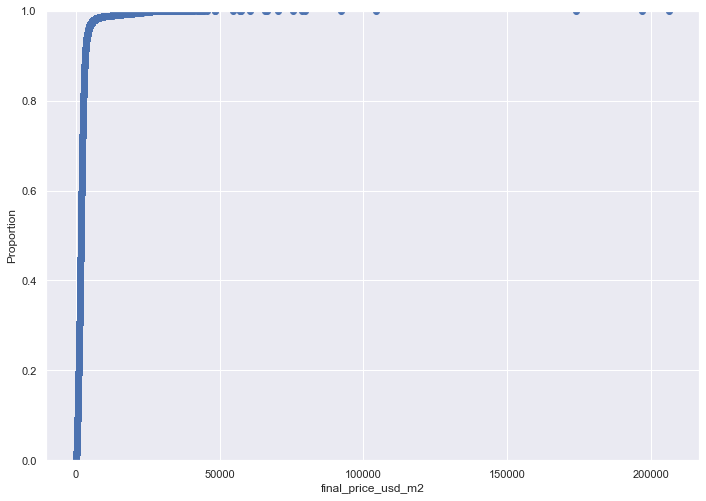

In [142]:
sns.ecdfplot(data9["final_price_usd_m2"], marker="o")
plt.ylim([0,1])
#plt.xlim([0,7000])

In [143]:
data9.isnull().sum()

property_type                     0
place_name                       22
place_with_parent_names           0
state_name                        0
lat-lon                       32489
price                          7818
currency                       7818
price_aprox_local_currency     7818
price_aprox_usd                7818
surface_total_in_m2           19246
surface_covered_in_m2          4722
price_usd_per_m2              25913
price_per_m2                  11904
rooms                         47602
description                       1
Provincia                         0
Localidad                         0
covered_imputados                 0
total_imputados                   0
final_price_usd_m2             7818
dtype: int64

In [144]:
#### aplicamos la función para final price usd m2  base tipo de propiedad y provincia
data9["final_price_usd_m2_sin_out"] = data9.groupby(['property_type', "Provincia"])['final_price_usd_m2'].apply(lambda x : calculo_outliers_superficie(x))

In [145]:
data9.isnull().sum()

property_type                     0
place_name                       22
place_with_parent_names           0
state_name                        0
lat-lon                       32489
price                          7818
currency                       7818
price_aprox_local_currency     7818
price_aprox_usd                7818
surface_total_in_m2           19246
surface_covered_in_m2          4722
price_usd_per_m2              25913
price_per_m2                  11904
rooms                         47602
description                       1
Provincia                         0
Localidad                         0
covered_imputados                 0
total_imputados                   0
final_price_usd_m2             7818
final_price_usd_m2_sin_out    11725
dtype: int64

In [146]:
#### vamos a probar cuantos nulos nos da si lo hacemos pro localidad
data9["final_price_usd_m2_sin_out_localidad"] = data9.groupby(['property_type', "Localidad"])['final_price_usd_m2'].apply(lambda x : calculo_outliers_superficie(x))

In [147]:
data9.isnull().sum()

property_type                               0
place_name                                 22
place_with_parent_names                     0
state_name                                  0
lat-lon                                 32489
price                                    7818
currency                                 7818
price_aprox_local_currency               7818
price_aprox_usd                          7818
surface_total_in_m2                     19246
surface_covered_in_m2                    4722
price_usd_per_m2                        25913
price_per_m2                            11904
rooms                                   47602
description                                 1
Provincia                                   0
Localidad                                   0
covered_imputados                           0
total_imputados                             0
final_price_usd_m2                       7818
final_price_usd_m2_sin_out              11725
final_price_usd_m2_sin_out_localid

(0.0, 5000.0)

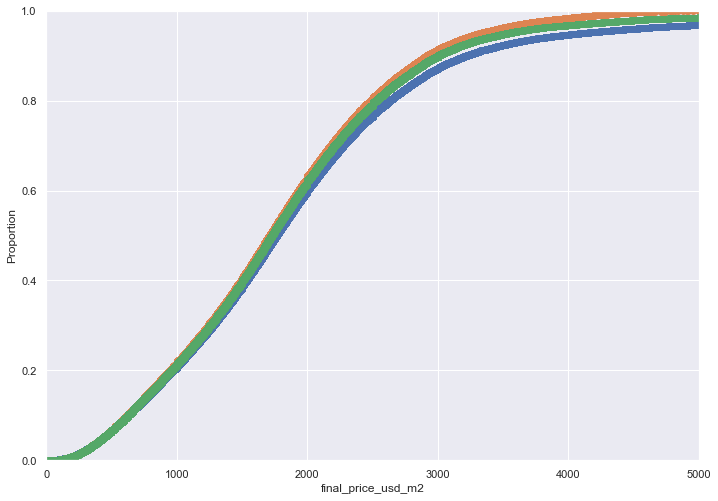

In [148]:
sns.ecdfplot(data9["final_price_usd_m2"], marker="o", label = 'con outliers')
sns.ecdfplot(data9['final_price_usd_m2_sin_out'], marker='o', label = 'sin outliers x prov')
sns.ecdfplot(data9['final_price_usd_m2_sin_out_localidad'], marker='X', label = 'sin outliers x loc')
plt.ylim([0,1])
plt.xlim([0,5000])

In [149]:
#vemos con describe como cambia

data9.groupby("property_type")["final_price_usd_m2_sin_out"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3969.0,1374.512729,557.878687,45.82,982.910,1293.71,1700.00,3364.84
apartment,41100.0,2210.413528,728.180033,226.17,1691.905,2119.05,2642.86,4815.24
house,23238.0,1018.664517,561.083424,11.07,583.330,923.07,1379.67,3452.86
store,1987.0,2065.550674,1469.809027,28.04,1027.290,1679.61,2693.87,8300.00


In [150]:
data9.groupby("property_type")["final_price_usd_m2_sin_out_localidad"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3951.0,1384.369990,663.380349,45.82,982.735,1292.310,1697.385,14067.17
apartment,41906.0,2449.860121,2033.359764,91.89,1702.420,2140.245,2690.820,35011.36
house,23239.0,1029.868306,619.568655,11.07,583.790,923.080,1384.160,15196.67
store,1975.0,2125.582506,1737.986385,28.04,1027.290,1677.420,2676.945,16843.69


(0.0, 200.0)

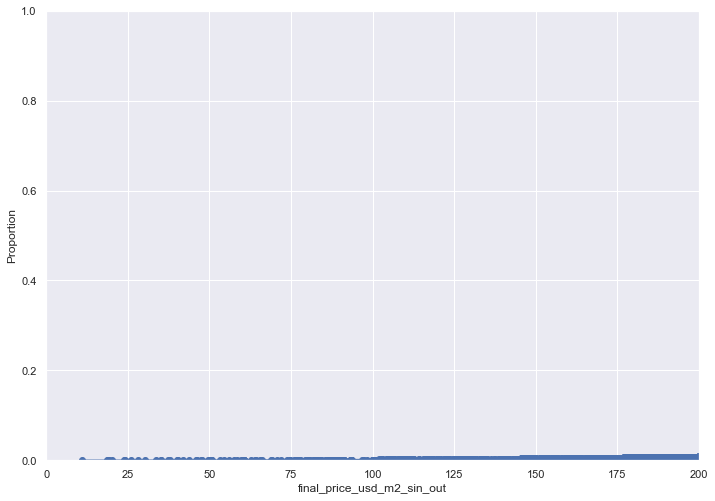

In [151]:
# Por provincia me borra mejor, asique ahora vamos a ver como queda sin los outliers vistos a ojo 

sns.ecdfplot(data9['final_price_usd_m2_sin_out'], marker='o', label = 'sin outliers x prov')
plt.ylim([0,1])
plt.xlim([0,200])


In [152]:
# vamos a cortar por 200 usd p0r m2 para los minimos, y 4.500 usd por  m2 para  los maximos


mask_mayores_4500_usd_m2 = data9["final_price_usd_m2_sin_out"] > 4500 
mask_menores_200_usd_m2 = data9["final_price_usd_m2_sin_out"] < 200

print("hay ", mask_mayores_4500_usd_m2.sum(), " propiedades con valor por m2 mayor a $4.500")
print("hay ",mask_menores_200_usd_m2.sum(), " propiedades con valor por m2 menor a $200")


hay  270  propiedades con valor por m2 mayor a $4.500
hay  570  propiedades con valor por m2 menor a $200


In [153]:
# ahora la columna final price usd per m2 va a tener 840 nulos mas, osea va a pasar a tener de 7.818 a 12.565 con todos los nulos

In [154]:
data9["final_price_mayores"] = data9["final_price_usd_m2_sin_out"].apply(lambda x: np.nan if x > 4500 else x)
data9["final_price_mayores_y_menores"] = data9["final_price_mayores"].apply(lambda x: np.nan if x < 200 else x)


data9.isnull().sum()

property_type                               0
place_name                                 22
place_with_parent_names                     0
state_name                                  0
lat-lon                                 32489
price                                    7818
currency                                 7818
price_aprox_local_currency               7818
price_aprox_usd                          7818
surface_total_in_m2                     19246
surface_covered_in_m2                    4722
price_usd_per_m2                        25913
price_per_m2                            11904
rooms                                   47602
description                                 1
Provincia                                   0
Localidad                                   0
covered_imputados                           0
total_imputados                             0
final_price_usd_m2                       7818
final_price_usd_m2_sin_out              11725
final_price_usd_m2_sin_out_localid

In [155]:
#igualamos la columna final price a la q armamos con los nulos

data9["final_price_usd_m2"] = data9["final_price_mayores_y_menores"]

data9.isnull().sum()

property_type                               0
place_name                                 22
place_with_parent_names                     0
state_name                                  0
lat-lon                                 32489
price                                    7818
currency                                 7818
price_aprox_local_currency               7818
price_aprox_usd                          7818
surface_total_in_m2                     19246
surface_covered_in_m2                    4722
price_usd_per_m2                        25913
price_per_m2                            11904
rooms                                   47602
description                                 1
Provincia                                   0
Localidad                                   0
covered_imputados                           0
total_imputados                             0
final_price_usd_m2                      12565
final_price_usd_m2_sin_out              11725
final_price_usd_m2_sin_out_localid

In [156]:
data9.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3953.0,1379.674055,553.057679,208.33,985.710,1296.18,1700.00,3364.84
apartment,40965.0,2202.649610,716.684442,226.17,1689.650,2115.92,2636.36,4500.00
house,22711.0,1039.005467,551.209151,200.00,603.635,940.00,1392.86,3452.86
store,1825.0,1806.951458,1017.981398,200.00,1007.580,1607.95,2416.67,4500.00


In [157]:
#borramso las columnas que no nos sirven

data9.drop(columns=["final_price_usd_m2_sin_out", "final_price_usd_m2_sin_out_localidad", "final_price_mayores", "final_price_mayores_y_menores"], inplace=True)

In [158]:
data9.isnull().sum()

property_type                     0
place_name                       22
place_with_parent_names           0
state_name                        0
lat-lon                       32489
price                          7818
currency                       7818
price_aprox_local_currency     7818
price_aprox_usd                7818
surface_total_in_m2           19246
surface_covered_in_m2          4722
price_usd_per_m2              25913
price_per_m2                  11904
rooms                         47602
description                       1
Provincia                         0
Localidad                         0
covered_imputados                 0
total_imputados                   0
final_price_usd_m2            12565
dtype: int64

In [159]:
#dropeamos los nulos de "final_price_usd_m2"
data9.dropna(subset=["final_price_usd_m2"], inplace=True)

In [160]:
data9.shape

(69454, 20)

In [161]:
#Corroboramos que sacamos np.inf y np.nan de "final_price_usd_m2"
data9.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3953.0,1379.674055,553.057679,208.33,985.710,1296.18,1700.00,3364.84
apartment,40965.0,2202.649610,716.684442,226.17,1689.650,2115.92,2636.36,4500.00
house,22711.0,1039.005467,551.209151,200.00,603.635,940.00,1392.86,3452.86
store,1825.0,1806.951458,1017.981398,200.00,1007.580,1607.95,2416.67,4500.00


- ### finalmente creamos la columna "final_price_usd_m2" que es la columna con todos los valores por m2 y sin nulos

In [162]:
data9.shape

(69454, 20)

# 4) Trabajamos sobre rejex para descubrir otras conexiones al precio

In [163]:
#vamos a separar la columna "description" para analizarla sola

data_description = data9["description"]

data_description.head(5)

0    2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...
2    2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
4    DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...
6    MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...
7    EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
Name: description, dtype: object

In [164]:
#vamos a ver los que son nulos

data_description_null = data_description.isnull()
print("hay ",data_description_null.sum(), "valores nulos")

#identificamos las dos filas q tienen valores nulos en "description"
data_description_null = data9[data9.description.isnull()]
data_description_null

hay  1 valores nulos


,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,Provincia,Localidad,covered_imputados,total_imputados,final_price_usd_m2
96691,apartment,San Fernando,Bs.As. G.B.A. Zona Norte|San Fernando|,Bs.As. G.B.A. Zona Norte,NaN,98000.0,USD,1729161.0,98000.0,NaN,55.0,NaN,1781.818182,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Fernando,55.0,62.93,1557.29


- ### 4.1) buscamos las propiedades que fueron refaccionadas 

In [165]:
pd.options.mode.chained_assignment = None  # default='warn'

In [166]:
#vamos a buscar la palabra "refaccionado" ya que podria afectar el precio al ser un departamento mejorado. estos datos los ingresamos en la columna nueva de "refaccionados"

import re

data9["refaccionado"] = data9["description"].str.contains(r'(?i)refac')

print(data9[["description","refaccionado"]].head(3))


                                         description refaccionado
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...         True
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...        False
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...        False


<p style="color:#FF0000";> Fijense que en la regex, el termino 'refac' contempla a 'refaccionado', por lo que no es necesario agregar al segundo

In [167]:
#ahora tenemos todos los refaccionados como True en la columna "refaccionados", vamos a ver cuantos departamentos refaccionados hay
#para eso definimos como 0 a las propiedades q no son 'refaccionadas' y como 1 las que si

data_refaccionado_column =  data9.apply(lambda x: 0 if x.refaccionado == False else 1, axis=1)

print(data_refaccionado_column.value_counts())

data9["refaccionado"] = data_refaccionado_column


0    68187
1     1267
dtype: int64


#### podemos decir q tenemos 1.267 propiedades que estan refaccionadas

- ### 4.2) buscamos las propiedades que tienen pileta

<p style="color:#FF0000";> 'piscina' puede ser una palabra con alta probabilidad de ser mal escrita. En este tipo de trabajos, donde las cargas de texto libres son totalmente informales, es buena idea incluir regex que contemplen typos o erroes de ortigrafia: piscina|pisina|picina

In [168]:
#ahora vamos a buscar los q tienen pileta

data9["pileta"] = data9["description"].str.contains(r'(?i)pileta|piscina|pisina|picina')
print(data9[["description","pileta"]])

                                              description pileta
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...  False
2       2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...  False
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...  False
6       MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...  False
7       EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...   True
...                                                   ...    ...
121157  Torre de 16º pisos ubicado en pleno centro com...   True
121158  Excelente Ubicación - Avenida Pueyrredon y Las...  False
121160  Edificio en esquina de muy buena categoría de ...  False
121216  Excelente e impecable casa en Venta en Las Lom...   True
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...  False

[69454 rows x 2 columns]


In [169]:
#hacemos lo mismo de ver cuantas propeidades tienen pileta y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_pileta_column =  data9.apply(lambda x: 0 if x.pileta == False else 1, axis=1)

print(data_pileta_column.value_counts())

#ponemos la data de pileta en la columna pileta del data frame
data9["pileta"] = data_pileta_column

#ahi quedo la columna pileta con 0s y 1s 
data9["pileta"] 


0    50213
1    19241
dtype: int64


0         0
2         0
4         0
6         0
7         1
         ..
121157    1
121158    0
121160    0
121216    1
121217    0
Name: pileta, Length: 69454, dtype: int64

#### podemos decir q tenemos 19.241 propiedades con pileta

- ### 4.3) buscamos las propiedades que tienen amenities

In [170]:
#ahora vamos a buscar los q tienen amenities

data9["amenities"] = data9["description"].str.contains(r'(?i)amenities')
print(data9[["description","amenities"]])

                                              description amenities
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...     False
2       2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...     False
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...     False
6       MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...     False
7       EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...     False
...                                                   ...       ...
121157  Torre de 16º pisos ubicado en pleno centro com...      True
121158  Excelente Ubicación - Avenida Pueyrredon y Las...     False
121160  Edificio en esquina de muy buena categoría de ...     False
121216  Excelente e impecable casa en Venta en Las Lom...     False
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...      True

[69454 rows x 2 columns]


In [171]:
#hacemos lo mismo de ver cuantas propeidades tienen amenities y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_amenities_column =  data9.apply(lambda x: 0 if x.amenities == False else 1, axis=1)

print(data_amenities_column.value_counts())


0    63183
1     6271
dtype: int64


In [172]:
#ponemos la data de amenities en la columna amenities del data frame
data9["amenities"] = data_amenities_column

#ahi quedo la columna amenities con 0s y 1s 
data9["amenities"] 


0         0
2         0
4         0
6         0
7         0
         ..
121157    1
121158    0
121160    0
121216    0
121217    1
Name: amenities, Length: 69454, dtype: int64

#### podemos decir q tenemos 6.271 propiedades con amenities

- ### 4.4) buscamos las propiedades que tienen cochera

<p style="color:#FF0000";> Hay que intentar hacer regex más amplias, que abarquen un mismo concepto mediante distintas palabras. En cochera podríamos agregar 'garage' por ejemplo

In [173]:
#ahora vamos a buscar los q tienen cochera

data9["cochera"] = data9["description"].str.contains(r'(?i)cochera')
print(data9[["description","cochera"]])

                                              description cochera
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   False
2       2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   False
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   False
6       MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...   False
7       EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...   False
...                                                   ...     ...
121157  Torre de 16º pisos ubicado en pleno centro com...    True
121158  Excelente Ubicación - Avenida Pueyrredon y Las...   False
121160  Edificio en esquina de muy buena categoría de ...   False
121216  Excelente e impecable casa en Venta en Las Lom...   False
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...    True

[69454 rows x 2 columns]


In [174]:
#hacemos lo mismo de ver cuantas propeidades tienen cochera y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_cochera_column =  data9.apply(lambda x: 0 if x.cochera == False else 1, axis=1)

print(data_cochera_column.value_counts())

data9["cochera"] = data_cochera_column

0    44855
1    24599
dtype: int64


#### podemos decir q tenemos 24.599 propiedades con cochera

- ### 4.5) buscamos las propiedades que se venden con financiacion y que muchas veces afectan el precio

In [175]:
#ahora vamos a buscar los q dicen cuotas o financiacion porque muchas veces me contaminan el precio, poniendo el valot de una cuota y que luego me afecta el precio por m2

data9["financiacion"] = data9["description"].str.contains(r'(?i)financiacion|cuota')
print(data9[["description","financiacion"]])

                                              description financiacion
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...        False
2       2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...        False
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...        False
6       MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...        False
7       EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...        False
...                                                   ...          ...
121157  Torre de 16º pisos ubicado en pleno centro com...        False
121158  Excelente Ubicación - Avenida Pueyrredon y Las...        False
121160  Edificio en esquina de muy buena categoría de ...        False
121216  Excelente e impecable casa en Venta en Las Lom...        False
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...        False

[69454 rows x 2 columns]


In [176]:
#hacemos lo mismo de ver cuantas propeidades tienen financiacion y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_financiacion_column =  data9.apply(lambda x: 0 if x.financiacion == False else 1, axis=1)

print(data_financiacion_column.value_counts())

data9["financiacion"] = data_financiacion_column

0    64017
1     5437
dtype: int64


#### podemos decir q tenemos 5.437 propiedades con cuotas o financiacion. estas propiedades deberiamos analizarla con la variable precio o precio por m2 a ver si encontramos una relacion de tener precio mas bajo q el promedio

In [177]:
data9.head(3)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,Provincia,Localidad,covered_imputados,total_imputados,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,...,Capital Federal,Mataderos,40.0,55.0,1127.27,1,0,0,0,0
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,...,Capital Federal,Mataderos,55.0,55.0,1309.09,0,0,0,0,0
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Cen...,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,...,Buenos Aires Costa Atlántica,Mar del Plata,35.0,35.0,1828.57,0,0,0,0,0


## 5) Ahora vamos a tratar de reconstruir la columna rooms con la data de description

In [178]:
data9.isnull().sum()

property_type                     0
place_name                       19
place_with_parent_names           0
state_name                        0
lat-lon                       27503
price                             0
currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2           16945
surface_covered_in_m2          3827
price_usd_per_m2              16945
price_per_m2                   3828
rooms                         41144
description                       1
Provincia                         0
Localidad                         0
covered_imputados                 0
total_imputados                   0
final_price_usd_m2                0
refaccionado                      0
pileta                            0
amenities                         0
cochera                           0
financiacion                      0
dtype: int64

In [179]:
data9.shape

(69454, 25)

In [180]:
data9["title"] = data["title"]

In [181]:
#Buscamos aquellas propiedades sin Rooms
mask_no_rooms = data9["rooms"].isnull()
data9.loc[mask_no_rooms,["rooms","description","title"]]

,rooms,description,title
0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
2,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
4,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...
6,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,..."
7,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...
...,...,...,...
121157,NaN,Torre de 16º pisos ubicado en pleno centro com...,Departamento - Belgrano C
121158,NaN,Excelente Ubicación - Avenida Pueyrredon y Las...,Departamento - Recoleta
121160,NaN,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...
121216,NaN,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...


In [182]:
#casteo columna description y title como string

data9["description"] = data9["description"].astype(str)
data9["title"] = data9["title"].astype(str)

In [183]:
#la cantidad de ambientes en description y title puede estar tanto en numeros como en numeros escritos en letras.
#Es por eso que buscamos ambos patrones en description y title

In [184]:
#Creo una funcion para la busqueda de patrones y me agregue los regex encontrados en una nueva columna al data frame
def buscador_patrones(patron, columna_de_trabajo, nombre_nueva_columna):
    patron_regex = re.compile(patron, re.IGNORECASE)
    matcheos = data9[columna_de_trabajo].apply(lambda x:x if x is np.NaN else patron_regex.search(x).group("numero") if patron_regex.search(x)!=None else np.NaN)
    data9.insert(13, nombre_nueva_columna, matcheos)

In [185]:
#Creamos patrones para buscar la cantidad explicita de ambientes en description y title.
ambientes_numero = "(?P<numero>\d\d?) ?(ambientes|ambiente|amb)"
ambientes_letras = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(ambientes|ambiente|amb)"

#Ejecuto la funcion tanto en la columna "decription" como la columna "title"
buscador_patrones(ambientes_numero, "description", "numero_ambientes_description")
buscador_patrones(ambientes_letras, "description", "numero_ambientes_desc_letras")
buscador_patrones(ambientes_numero, "title", "numero_ambientes_title")
buscador_patrones(ambientes_letras, "title", "numero_ambientes_title_letras")

In [186]:
data9.loc[mask_no_rooms,["rooms","description","title","numero_ambientes_description","numero_ambientes_desc_letras","numero_ambientes_title","numero_ambientes_title_letras"]].head(10)

,rooms,description,title,numero_ambientes_description,numero_ambientes_desc_letras,numero_ambientes_title,numero_ambientes_title_letras
0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,2,NaN,2,NaN
2,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,2,NaN,2,NaN
4,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,NaN,NaN,2,NaN
6,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",NaN,NaN,NaN,NaN
7,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,NaN,MONO,NaN,MONO
8,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",NaN,DOS,NaN,DOS
12,NaN,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,2,NaN,2,NaN
15,NaN,ULTIMA UNIDAD DISPONIBLEHAUS BOULEVARD: Metros...,HAUS VILLAGE / BELLA VISTA / 115m² MAS PATIO /...,NaN,NaN,NaN,NaN
18,NaN,Casa sobre lote al golf en barrio San Isidro L...,"Casa en venta en barrio San Isidro Labrador, T...",NaN,NaN,NaN,NaN
22,NaN,Edificada en 2 plantas. PB. amplio living con ...,CASA EN VENTA A ESTRENAR EN EL NACIONAL,NaN,NaN,NaN,NaN


In [187]:
# data9["numero_ambientes_desc_letras"] = data9["numero_ambientes_desc_letras"].astype(str)
# data9["numero_ambientes_title_letras"] = data9["numero_ambientes_title_letras"].astype(str)

In [188]:
data9["numero_ambientes_desc_letras"].unique()

array([nan, 'MONO', 'DOS', 'cinco', 'tres', 'mono', 'Mono', 'TRES', 'Dos',
       'dos', 'un', 'UN', 'cuatro', 'Tres', 'CINCO', 'CUATRO', 'Un',
       'Cuatro', 'Cinco', 'SEIS', 'seis', 'SIETE', 'siete', 'diez',
       'nueve'], dtype=object)

In [189]:
data9["numero_ambientes_title_letras"].unique()

array([nan, 'MONO', 'DOS', 'UN', 'Mono', 'TRES', 'tres', 'mono', 'un',
       'dos', 'Dos', 'CUATRO', 'Un', 'cuatro', 'Tres', 'cinco', 'Cuatro',
       'CINCO', 'seis', 'SEIS', 'siete'], dtype=object)

In [190]:
# #combierto amb_desc_letras y amb_title_letras en minuscula para estandarizar las columnas
# data9["numero_ambientes_desc_letras"] = data9["numero_ambientes_desc_letras"].str.lower()
# data9["numero_ambientes_title_letras"] = data9["numero_ambientes_title_letras"].str.lower()

In [191]:
#Reemplazamos aquellos numeros en letras con numeros, lo hacemos con un diccionario
dictionary = {"mono":1,"MONO":1,"Mono":1, "un":1, "UN":1,"Un":1,"dos":2,"DOS":2,"Dos":2,"tres":3,"TRES":3,"Tres":3,"cuatro":4,"CUATRO":4,"Cuatro":4,"cinco":5,"CINCO":5,"seis":6,"SEIS":6,"siete":7,"SIETE":7,"ocho":8,"OCHO":8,"nueve":9,"NUEVE":9,"diez":10,"DIEZ":10}
data9["numero_ambientes_desc_letras"] = data9["numero_ambientes_desc_letras"].replace(dictionary)
data9["numero_ambientes_title_letras"] = data9["numero_ambientes_title_letras"].replace(dictionary)

In [192]:
data9.loc[mask_no_rooms,["numero_ambientes_description","numero_ambientes_desc_letras","numero_ambientes_title","numero_ambientes_title_letras"]].head(10)

,numero_ambientes_description,numero_ambientes_desc_letras,numero_ambientes_title,numero_ambientes_title_letras
0,2,NaN,2,NaN
2,2,NaN,2,NaN
4,NaN,NaN,2,NaN
6,NaN,NaN,NaN,NaN
7,NaN,1,NaN,1.0
8,NaN,2,NaN,2.0
12,2,NaN,2,NaN
15,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN


In [193]:
data9.isnull().sum()

property_type                        0
place_name                          19
place_with_parent_names              0
state_name                           0
lat-lon                          27503
price                                0
currency                             0
price_aprox_local_currency           0
price_aprox_usd                      0
surface_total_in_m2              16945
surface_covered_in_m2             3827
price_usd_per_m2                 16945
price_per_m2                      3828
numero_ambientes_title_letras    65319
numero_ambientes_title           52772
numero_ambientes_desc_letras     59640
numero_ambientes_description     42739
rooms                            41144
description                          0
Provincia                            0
Localidad                            0
covered_imputados                    0
total_imputados                      0
final_price_usd_m2                   0
refaccionado                         0
pileta                   

In [194]:
#Reemplazamos los nulos en rooms con las columnas contruidas
data9["rooms"].fillna(data9["numero_ambientes_description"], inplace=True)
data9["rooms"].fillna(data9["numero_ambientes_desc_letras"], inplace=True)
data9["rooms"].fillna(data9["numero_ambientes_title"], inplace=True)
data9["rooms"].fillna(data9["numero_ambientes_title_letras"], inplace=True)

In [195]:
#Vemos como se redujo considerablemente la cantidad de nulos en rooms
data9["rooms"].isnull().sum()

21552

#### Para aquellas propiedades sin la cantidad explicita de ambientes detalle en las columnas description y title vamos a tratar de armarlos con la informacion restante de las mismas.

In [196]:
#Comenzamos con dormitorios

#Patrones
dormitorios_numeros = "(?P<numero>\d\d?) ?(dorm|cuarto)"
dormitorios_letras = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(dorm|cuarto)"

#ejecuto la funcion buscador_patrones
buscador_patrones(dormitorios_numeros, "description", "dormitorios_numeros")
buscador_patrones(dormitorios_letras, "description", "dormitorios_letras")

In [197]:
data9.loc[:,["dormitorios_numeros","dormitorios_letras"]]

,dormitorios_numeros,dormitorios_letras
0,NaN,NaN
2,NaN,NaN
4,1,NaN
6,NaN,DOS
7,NaN,NaN
...,...,...
121157,NaN,NaN
121158,NaN,NaN
121160,NaN,NaN
121216,3,NaN


In [198]:
data9["dormitorios_letras"].unique()

array([nan, 'DOS', 'tres', 'dos', 'Dos', 'Tres', 'un', 'cuatro', 'Un',
       'UN', 'TRES', 'Cuatro', 'Cinco', 'CUATRO', 'cinco', 'TRes',
       'siete', 'CINCO', 'Seis', 'seis'], dtype=object)

In [199]:
# data9["dormitorios_letras"] = data9["dormitorios_letras"].astype(str)

In [200]:
#Reemplazo las letras por integers
data9["dormitorios_letras"] = data9["dormitorios_letras"].str.lower()
diccionario_letras = {"mono":1,"MONO":1,"Mono":1, "un":1, "UN":1,"Un":1,"dos":2,"DOS":2,"Dos":2,"tres":3,"TRES":3,"Tres":3,"cuatro":4,"CUATRO":4,"Cuatro":4,"cinco":5,"CINCO":5,"seis":6,"SEIS":6,"siete":7,"SIETE":7,"ocho":8,"OCHO":8,"nueve":9,"NUEVE":9,"diez":10,"DIEZ":10}
data9["dormitorios_letras"] = data9["dormitorios_letras"].replace(diccionario_letras)

In [201]:
data9.loc[:,["property_type","rooms"]]

,property_type,rooms
0,PH,2
2,apartment,2
4,apartment,2
6,PH,NaN
7,apartment,1
...,...,...
121157,apartment,NaN
121158,apartment,1
121160,apartment,NaN
121216,house,NaN


In [202]:
data9["rooms"].isnull().sum()

21552

In [203]:
mascara_nulos = data9["rooms"].isnull()
data9.loc[mascara_nulos,["dormitorios_numeros","dormitorios_letras"]]

,dormitorios_numeros,dormitorios_letras
6,NaN,2.0
15,3,NaN
18,NaN,3.0
22,3,NaN
26,NaN,2.0
...,...,...
121154,3,NaN
121155,3,NaN
121157,NaN,NaN
121160,NaN,NaN


In [204]:
# Eliminamos los signos de puntuación de la columna description
regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
pattern = re.compile(regex)
data9["description_clean"] = data9["description"].apply(lambda x: pattern.sub("", x))
data9.loc[:,["description_clean","rooms"]]

,description_clean,rooms
0,2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO ...,2
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2
4,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,2
6,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,NaN
7,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,1
...,...,...
121157,Torre de 16º pisos ubicado en pleno centro com...,NaN
121158,Excelente Ubicación Avenida Pueyrredon y Las ...,1
121160,Edificio en esquina de muy buena categoría de ...,NaN
121216,Excelente e impecable casa en Venta en Las Lom...,NaN


In [205]:
#Vamos a buscar los siguientes ambientes para poder completar rooms:
#Cocina Comedor
#Living Comedor
#Cocina separada
#Living separado
#Comedor separado

In [206]:
data9["description_clean"].sample(20)

25723     CTD816 NO BUSQUES MAS TU DEPA SOLO POR US 3320...
11640     SE TRATA DE UN DEPARTAMENTO TIPO CASA LATERAL ...
89698     Departamento 2 amb Sobre la calle Lincoln y sa...
71511     Departamento 43m² con SUM en Suarez 1700 Capit...
18680     Impecable departamento de 2 ambientes al frent...
74964     VENTA DEPARTAMENTO 2 AMBIENTES LINIERS VILLA L...
419       Muy linda casa de 3amb con cochera cubierta se...
21710     Venta y alquiler de Departamento 5 AMBIENTES e...
76215     Venta de Departamento 3 AMBIENTES en Barracas ...
64984     Monoambiente a estrenar de 40 m2 con balcon co...
50587     EN EXCELENTE ZONA DE ACASSUSO ENTRE VIAS Y AVE...
116425    Venta  Departamento  Argentina Buenos Aires Ca...
102597    COMERCIALIZA EN EXCLUSIVIDAD  MIERES PROPIEDAD...
102265    Dpto 2 amb al frente en la zona de Munro Cuent...
84125     Excelente monoambiente a estrenar compuesto de...
114052    Excelente 2 ambientes al frente todo en Planta...
114321    Corredor Responsable Marcela L

In [207]:
#Busco si contienen las siguientes palabras para sumarlas como ambientes
data9["cocina_comedor"] = data9.loc[mascara_nulos,"description_clean"].str.contains(r'cocina comedor?') #cocina comedor
data9["living_comedor"] = data9.loc[mascara_nulos,"description_clean"].str.contains(r'living comedor?') #living comedor
data9["cocina_unica"] = data9.loc[mascara_nulos, "description_clean"].str.contains(r'cocina?') #cocina unica
data9["living_unico"] = data9.loc[mascara_nulos,"description_clean"].str.contains(r'living?') #living unico
data9["comedor_unico"] = data9.loc[mascara_nulos,"description_clean"].str.contains(r'comedor?') #comedor unico

In [208]:
data9.loc[mascara_nulos,["cocina_comedor","living_comedor", "cocina_unica", "living_unico", "comedor_unico"]]

,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico
6,False,False,False,False,False
15,False,True,True,True,True
18,False,False,False,False,True
22,False,False,True,True,False
26,False,True,True,True,True
...,...,...,...,...,...
121154,False,False,True,True,True
121155,False,True,True,True,True
121157,False,False,False,False,False
121160,False,True,True,True,True


In [209]:
#Aquellas propiedas en las que es True les agregamos 1, en aquellas que es False les ponemos 0.
data9["cocina_comedor"] =  data9["cocina_comedor"].apply(lambda x: 0 if x == False else 1)
data9["living_comedor"] =  data9["living_comedor"].apply(lambda x: 0 if x == False else 1)
data9["cocina_unica"] =  data9["cocina_unica"].apply(lambda x: 0 if x == False else 1)
data9["living_unico"] =  data9["living_unico"].apply(lambda x: 0 if x == False else 1)
data9["comedor_unico"] =  data9["comedor_unico"].apply(lambda x: 0 if x == False else 1)

In [210]:
data9.loc[mascara_nulos,["cocina_comedor","living_comedor", "cocina_unica", "living_unico", "comedor_unico"]]

,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico
6,0,0,0,0,0
15,0,1,1,1,1
18,0,0,0,0,1
22,0,0,1,1,0
26,0,1,1,1,1
...,...,...,...,...,...
121154,0,0,1,1,1
121155,0,1,1,1,1
121157,0,0,0,0,0
121160,0,1,1,1,1


In [211]:
data9["dormitorios_numeros"] = data9["dormitorios_numeros"].astype(float)
data9["cocina_comedor"] = data9["cocina_comedor"].astype(float)
data9["living_comedor"] = data9["living_comedor"].astype(float)
data9["cocina_unica"] = data9["cocina_unica"].astype(float)
data9["living_unico"] = data9["living_unico"].astype(float)
data9["comedor_unico"] = data9["comedor_unico"].astype(float)

In [212]:
#Sumamos la cantidad de ambientes y lo almacenamos en la columna ambientes
columnas_lista = ["dormitorios_numeros","cocina_comedor", "living_comedor","cocina_unica", "living_unico", "comedor_unico"]
columnas_lista
data9["ambientes"] = data9[columnas_lista].sum(axis=1)
data9.loc[mascara_nulos,["rooms","dormitorios_numeros","cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"]].sample(15)

,rooms,dormitorios_numeros,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
106301,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
99142,NaN,2.0,0.0,0.0,0.0,0.0,0.0,2.0
102776,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
85816,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
24342,NaN,2.0,0.0,0.0,1.0,1.0,1.0,5.0
72206,NaN,NaN,1.0,0.0,1.0,1.0,1.0,4.0
96607,NaN,48.0,0.0,0.0,1.0,0.0,1.0,50.0
98243,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0
5020,NaN,2.0,0.0,0.0,1.0,0.0,1.0,4.0
98908,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
#Para no repetir la cantidad de ambientes aplicaciones ciertas condiciones logicas:

#Para aquellas propiedades que tenemos la cantidad de dormitorios y no tienen cocina o cocina_comedor les agregamos 1 ambiente que seria la cocina. Ya que estimamos
# que todas las propiedades cuenta con cocina.

data9["ambientes"] = data9.apply(lambda x: x.ambientes + 1 if (x.dormitorios_numeros > 0) and (x.cocina_comedor == 0) and (x.cocina_unica == 0) else x.ambientes, axis=1)
#Aquellas propiedades que los regex nos trajeron cocina_comedor y cocina_unica les restamos 1 ambiente
data9["ambientes"] = data9.apply(lambda x: x.ambientes - 1 if (x.dormitorios_numeros > 0) and (x.cocina_comedor == 1) and (x.cocina_unica == 1) else x.ambientes, axis=1)
#Aquellas propiedads que los regex nos trajeron living_comedor y living_unico les restamos 1 ambiente
data9["ambientes"] = data9.apply(lambda x: x.ambientes - 1 if (x.dormitorios_numeros > 0) and (x.living_comedor == 1) and (x.living_unico == 1) else x.ambientes, axis=1)
#Para no duplicar el ambiente comedor 
data9["ambientes"] = data9.apply(lambda x: x.ambientes - 1 if (x.cocina_comedor == 1) and (x.comedor_unico == 1) else x.ambientes, axis=1)
data9["ambientes"] = data9.apply(lambda x: x.ambientes - 1 if (x.living_comedor ==1) and (x.comedor_unico == 1) else x.ambientes, axis=1)

In [214]:
data9.loc[mascara_nulos,["rooms","dormitorios_numeros","cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"]].head(10)

,rooms,dormitorios_numeros,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
15,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
18,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
22,NaN,3.0,0.0,0.0,1.0,1.0,0.0,5.0
26,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0
27,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
30,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
36,NaN,3.0,1.0,1.0,1.0,1.0,1.0,4.0
39,NaN,2.0,0.0,0.0,0.0,0.0,0.0,3.0
42,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0


In [215]:
data9["ambientes"] = data9["ambientes"].replace(0, np.nan)
data9.loc[mascara_nulos,["rooms","dormitorios_numeros","cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"]].head(20)

,rooms,dormitorios_numeros,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
15,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
18,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
22,NaN,3.0,0.0,0.0,1.0,1.0,0.0,5.0
26,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0
27,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
30,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
36,NaN,3.0,1.0,1.0,1.0,1.0,1.0,4.0
39,NaN,2.0,0.0,0.0,0.0,0.0,0.0,3.0
42,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0


In [216]:
#reemplazamos los nulos en rooms con la cantidad de ambientes que construimos
data9["rooms"].fillna(data9["ambientes"], inplace=True)
#Vemos que la cantidad de nulos en rooms bajo considerablemente.
data9["rooms"].isnull().sum()
# data9.head()

6167

In [217]:
#eliminamos aquellas columnas que no necesitamos mas
#"comedor_unico","dormitorios_letras","dormitorios_numeros","dormitorios_numeros","ambientes","numero_ambientes_title_letras"
data9.drop(columns=["numero_ambientes_title", "numero_ambientes_desc_letras", "numero_ambientes_description", "description_clean"], inplace=True)
data9.drop(columns=["cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"],inplace=True)

In [218]:
data9["rooms"].unique()

array(['2', nan, 1, 2, 5.0, 4.0, 3.0, '3', 6.0, '6', '4', 9.0, 7.0, '7',
       '1', 10.0, '5', 8.0, 50.0, 63.0, '9', 85.0, '8', 13.0, '17', '03',
       '72', '15', '00', '11', 11.0, 25.0, 14.0, 34.0, 26.0, '10', '12',
       54.0, 51.0, 53.0, 24.0, 12.0, 16.0, 22.0, '74', 32.0, '06', 55.0,
       '36', 36.0, 42.0, 81.0, '16', 43.0, '01', 52.0, 61.0, '04', '14',
       '24', '20', '50', '23', 18.0, 20.0, 17.0, 15.0], dtype=object)

In [219]:
data9.isnull().sum()

property_type                        0
place_name                          19
place_with_parent_names              0
state_name                           0
lat-lon                          27503
price                                0
currency                             0
price_aprox_local_currency           0
price_aprox_usd                      0
surface_total_in_m2              16945
surface_covered_in_m2             3827
price_usd_per_m2                 16945
price_per_m2                      3828
dormitorios_letras               56473
dormitorios_numeros              48323
numero_ambientes_title_letras    65319
rooms                             6167
description                          0
Provincia                            0
Localidad                            0
covered_imputados                    0
total_imputados                      0
final_price_usd_m2                   0
refaccionado                         0
pileta                               0
amenities                

In [220]:
data9.dtypes

property_type                     object
place_name                        object
place_with_parent_names           object
state_name                        object
lat-lon                           object
price                            float64
currency                          object
price_aprox_local_currency       float64
price_aprox_usd                  float64
surface_total_in_m2              float64
surface_covered_in_m2            float64
price_usd_per_m2                 float64
price_per_m2                     float64
dormitorios_letras               float64
dormitorios_numeros              float64
numero_ambientes_title_letras    float64
rooms                             object
description                       object
Provincia                         object
Localidad                         object
covered_imputados                float64
total_imputados                  float64
final_price_usd_m2               float64
refaccionado                       int64
pileta          

In [221]:
data9["rooms"].isnull().sum()

6167

In [222]:
data9["rooms"] = data9["rooms"].astype(float)

In [223]:
data9.groupby("property_type")["rooms"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3757.0,3.209476,1.795758,1.0,3.0,3.0,4.0,53.0
apartment,38493.0,2.393760,1.364995,0.0,2.0,2.0,3.0,72.0
house,20602.0,3.927774,2.357522,0.0,3.0,4.0,5.0,85.0
store,435.0,2.280460,1.709140,1.0,1.0,2.0,3.0,14.0


In [224]:
data9["rooms_sin_outliers"] = data9.groupby('property_type')['rooms'].apply(lambda x : calculo_outliers_superficie(x))

In [225]:
data9.groupby("property_type")["rooms_sin_outliers"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3500.0,3.171429,0.857218,2.0,3.0,3.0,4.0,5.0
apartment,37386.0,2.294442,0.953497,1.0,2.0,2.0,3.0,4.0
house,20391.0,3.804178,1.413712,0.0,3.0,4.0,5.0,8.0
store,427.0,2.138173,1.316960,1.0,1.0,2.0,3.0,6.0


(0.0, 40.0)

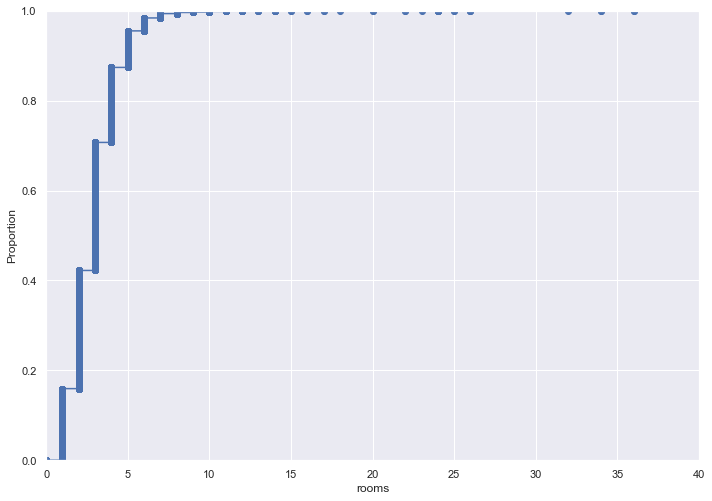

In [226]:
#vamos a convertir outliers en nulos para la columna rooms, veamos la distr. norm acumulada

sns.ecdfplot(data9['rooms'], marker='o', label = 'rooms con outliers')
plt.ylim([0,1])
plt.xlim([0,40])

(0.0, 10.0)

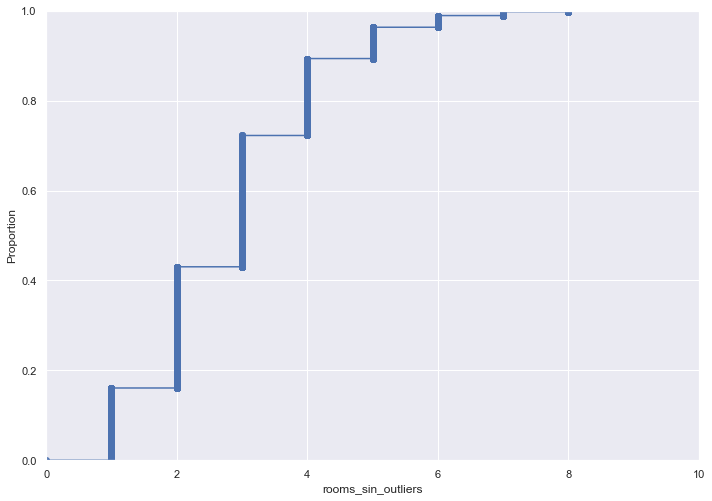

In [227]:
#vamos a convertir outliers en nulos para la columna rooms SIN outliers, veamos la distr. norm acumulada

sns.ecdfplot(data9['rooms_sin_outliers'], marker='o', label = 'rooms con outliers')
plt.ylim([0,1])
plt.xlim([0,10])

In [228]:
data9.isnull().sum()

property_type                        0
place_name                          19
place_with_parent_names              0
state_name                           0
lat-lon                          27503
price                                0
currency                             0
price_aprox_local_currency           0
price_aprox_usd                      0
surface_total_in_m2              16945
surface_covered_in_m2             3827
price_usd_per_m2                 16945
price_per_m2                      3828
dormitorios_letras               56473
dormitorios_numeros              48323
numero_ambientes_title_letras    65319
rooms                             6167
description                          0
Provincia                            0
Localidad                            0
covered_imputados                    0
total_imputados                      0
final_price_usd_m2                   0
refaccionado                         0
pileta                               0
amenities                

In [229]:
#Los maximos me parecieron numeros razonables es por eso que solo me enfoque en los menores, transforme en nulos aquellas propiedades con rooms menores a 1
data9["rooms_sin_outliers_y_menores"] = data9["rooms_sin_outliers"].apply(lambda x: np.nan if x < 1 else x)

In [230]:
#Es importante tener en cuenta que de los 7000 nulos no soy todos outliers, la gran mayoria de esos nulos vienen de la columna original "Rooms", que no les pudimos encontrar un numero con las regex

In [231]:
data9.isnull().sum()

property_type                        0
place_name                          19
place_with_parent_names              0
state_name                           0
lat-lon                          27503
price                                0
currency                             0
price_aprox_local_currency           0
price_aprox_usd                      0
surface_total_in_m2              16945
surface_covered_in_m2             3827
price_usd_per_m2                 16945
price_per_m2                      3828
dormitorios_letras               56473
dormitorios_numeros              48323
numero_ambientes_title_letras    65319
rooms                             6167
description                          0
Provincia                            0
Localidad                            0
covered_imputados                    0
total_imputados                      0
final_price_usd_m2                   0
refaccionado                         0
pileta                               0
amenities                

In [232]:
#eliminamos los nulos de rooms q son los XXX filas

data10 = data9.dropna(subset = ["rooms_sin_outliers_y_menores"])

In [233]:
data10.shape

(61703, 31)

In [234]:
data10.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat-lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'dormitorios_letras',
       'dormitorios_numeros', 'numero_ambientes_title_letras', 'rooms',
       'description', 'Provincia', 'Localidad', 'covered_imputados',
       'total_imputados', 'final_price_usd_m2', 'refaccionado', 'pileta',
       'amenities', 'cochera', 'financiacion', 'title', 'rooms_sin_outliers',
       'rooms_sin_outliers_y_menores'],
      dtype='object')

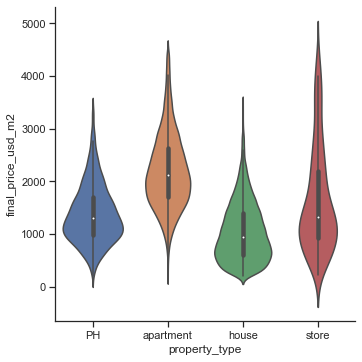

In [235]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "property_type", y = "final_price_usd_m2", data=data10, kind="violin")
    g.set_axis_labels("property_type", "final_price_usd_m2");

<p style="color:#FF0000";> En este gráfico se nota cómo la NO agrupación por tipo de propiedad al momento de limpiar outliers hace que siga habiendo ruido en las variables

<AxesSubplot:xlabel='final_price_usd_m2', ylabel='Count'>

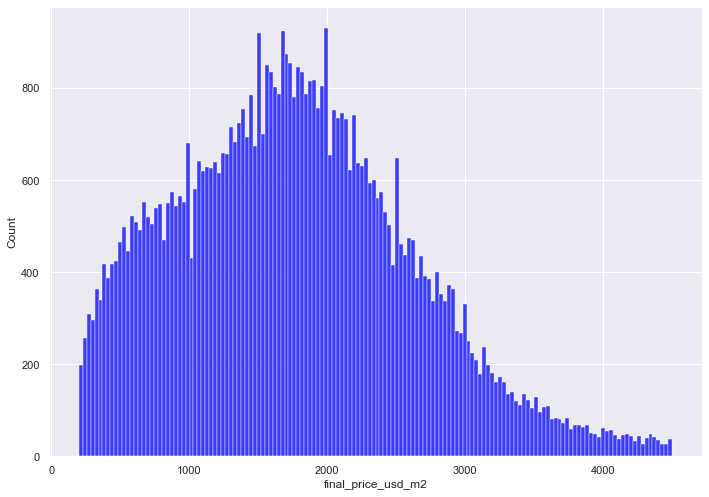

In [236]:
sns.histplot(data10['final_price_usd_m2'], color = "blue", bins = 150)

<p style="color:#FF0000";> Estimados, creo atacaron todos los objetivos planteado por el desafio pero sería bueno pegarle una revisión al trabajo de cara a la confección del modelo en el Desafio 2. Hay 2 o 3 comentarios que les hice que pueden ser claves para hallanar el camino al momento de predecir la variable target.

<p style="color:#FF0000";> Creo que faltó un poco de trabajo análitico en la parte de visualización pero estoy seguro que fue por cuestiones de tiempo más que por cuestiones técnicas o falta de ideas,  lo que es super entendible!

<p style="color:#FF0000";> Me gustó que se animaran a usar Markdowns para comentar la notebook, ayuda mucho al lector (y a ustedes mismos) a saber qué se está haciendo. Creo que por momento hubo un exceso de comentario, tal vez con comentar ideas generales de lo que se va a hacer en los siguientes 3 o 4 bloques alcanza. No es necesario relatar todas las líneas lo que se está haciendo, sino más bien guiar al lector en términos más generales

<h3 style="color:#FF0000";>  Felicitaciones por la entrega del primer desafio, a seguir !

### TRABAJO PRACTICO DOS - MODELO REGRESION LINEAL MULTIPLE

In [237]:
#¿Cómo mejorar un modelo lineal?
#Las perillas en un modelo lineal no son muchas ya que no tenemos hiperparametros, lo que se puede hacer es:
#1)	Incluir data al modelo
#2)	Pre procesar la data mejor, limpiarla mejor, eliminando outliers por ejemplo.
#3)	Generar nuevas variables.
#4)	Proponer interacciones entre variables

In [238]:
data10.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat-lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'dormitorios_letras',
       'dormitorios_numeros', 'numero_ambientes_title_letras', 'rooms',
       'description', 'Provincia', 'Localidad', 'covered_imputados',
       'total_imputados', 'final_price_usd_m2', 'refaccionado', 'pileta',
       'amenities', 'cochera', 'financiacion', 'title', 'rooms_sin_outliers',
       'rooms_sin_outliers_y_menores'],
      dtype='object')

In [239]:
data10.isnull().sum()

property_type                        0
place_name                          18
place_with_parent_names              0
state_name                           0
lat-lon                          23036
price                                0
currency                             0
price_aprox_local_currency           0
price_aprox_usd                      0
surface_total_in_m2              14796
surface_covered_in_m2             3228
price_usd_per_m2                 14796
price_per_m2                      3229
dormitorios_letras               49977
dormitorios_numeros              41488
numero_ambientes_title_letras    57593
rooms                                0
description                          0
Provincia                            0
Localidad                            0
covered_imputados                    0
total_imputados                      0
final_price_usd_m2                   0
refaccionado                         0
pileta                               0
amenities                

In [240]:
#Nos quedamos con aquellas variables que vamos a utilizar en el modelo
data11 = data10.loc[:,["property_type","Provincia","Localidad","final_price_usd_m2","rooms_sin_outliers_y_menores","covered_imputados","total_imputados","refaccionado","pileta", "amenities","cochera"\
                      ,"financiacion"]]

In [241]:
data11.rename(columns={"covered_imputados":"superficie_cubierta", "total_imputados":"superficie_total","final_price_usd_m2":"price_usd_m2","rooms_sin_outliers_y_menores":\
              "ambientes"}, inplace=True)

In [242]:
data11.head()

,property_type,Provincia,Localidad,price_usd_m2,ambientes,superficie_cubierta,superficie_total,refaccionado,pileta,amenities,cochera,financiacion
0,PH,Capital Federal,Mataderos,1127.27,2.0,40.0,55.0,1,0,0,0,0
2,apartment,Capital Federal,Mataderos,1309.09,2.0,55.0,55.0,0,0,0,0,0
4,apartment,Buenos Aires Costa Atlántica,Mar del Plata,1828.57,2.0,35.0,35.0,0,0,0,0,0
7,apartment,Capital Federal,Belgrano,3066.67,1.0,40.0,45.0,0,1,0,0,0
8,apartment,Capital Federal,Belgrano,3000.00,2.0,60.0,65.0,0,1,0,0,0


In [243]:
data11.isnull().sum()

property_type          0
Provincia              0
Localidad              0
price_usd_m2           0
ambientes              0
superficie_cubierta    0
superficie_total       0
refaccionado           0
pileta                 0
amenities              0
cochera                0
financiacion           0
dtype: int64

In [244]:
data11.dtypes

property_type           object
Provincia               object
Localidad               object
price_usd_m2           float64
ambientes              float64
superficie_cubierta    float64
superficie_total       float64
refaccionado             int64
pileta                   int64
amenities                int64
cochera                  int64
financiacion             int64
dtype: object

### Analizamos la correlacion de las variables y vemos si hay multicolinealidad entre las variables

In [245]:
#realizmaos una matriz de correlaciones
features = ["price_usd_m2","superficie_cubierta","superficie_total", "ambientes", "refaccionado", "pileta", "amenities","cochera","financiacion"]
data11[features].corr()

,price_usd_m2,superficie_cubierta,superficie_total,ambientes,refaccionado,pileta,amenities,cochera,financiacion
price_usd_m2,1.000000,-0.401435,-0.512007,-0.337804,-0.043545,0.052543,0.319684,0.192361,0.073201
superficie_cubierta,-0.401435,1.000000,0.832823,0.545931,0.043039,0.324592,-0.160524,-0.069795,-0.136507
superficie_total,-0.512007,0.832823,1.000000,0.489608,0.034008,0.295085,-0.152265,-0.080177,-0.121626
ambientes,-0.337804,0.545931,0.489608,1.000000,0.054706,0.119045,-0.148579,-0.036999,-0.142657
refaccionado,-0.043545,0.043039,0.034008,0.054706,1.000000,-0.028388,-0.040084,-0.038617,-0.031597
pileta,0.052543,0.324592,0.295085,0.119045,-0.028388,1.000000,0.310503,0.160286,0.046180
amenities,0.319684,-0.160524,-0.152265,-0.148579,-0.040084,0.310503,1.000000,0.200148,0.145195
cochera,0.192361,-0.069795,-0.080177,-0.036999,-0.038617,0.160286,0.200148,1.000000,0.148589
financiacion,0.073201,-0.136507,-0.121626,-0.142657,-0.031597,0.046180,0.145195,0.148589,1.000000


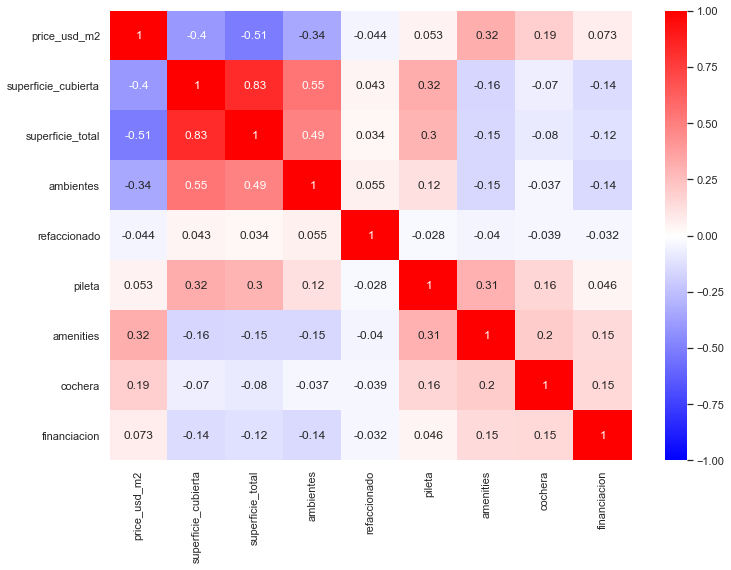

In [246]:
#Visualizamos la matriz de correlacion en Seaborn usando un heatmap
sns.heatmap(data11[features].corr(), vmin=-1, vmax=1, center=0, cmap="bwr", annot=True);

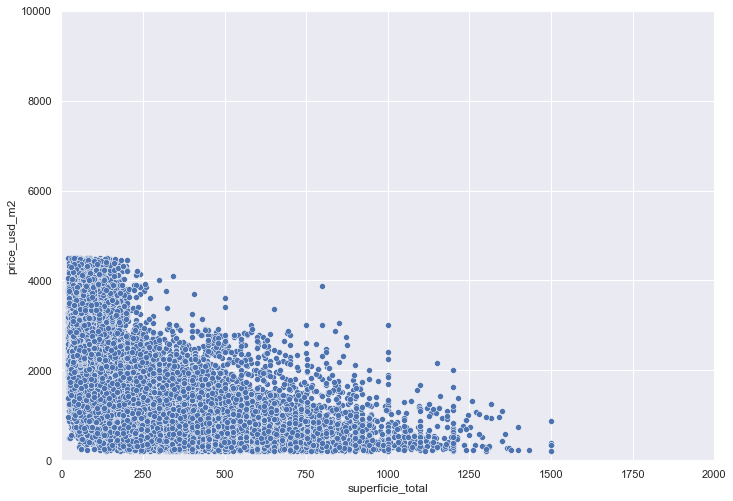

In [247]:
sns.scatterplot(data = data11, x = "superficie_total", y = "price_usd_m2");
plt.ylim([0,10000])
plt.xlim([0,2000])
plt.show()

### Utilizamos el VIF para medir la multicolinealidad entre variables

In [248]:
#Analizamos el VIF (variance inflation factor)
#si el VIF > 10 puede llegar a hacer ruido la varible
#si el VIF > 30 se recomienda sacar la variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(data11[features].values,i) for i in range(data11[features].shape[1])]
vif = pd.DataFrame({"vif":vif}, index=features)
vif.sort_values(by="vif", ascending=False)

,vif
superficie_cubierta,8.897508
superficie_total,6.439755
ambientes,5.751940
price_usd_m2,3.444366
pileta,1.930184
cochera,1.726302
amenities,1.432107
financiacion,1.128265
refaccionado,1.024417


In [249]:
data11.head()

,property_type,Provincia,Localidad,price_usd_m2,ambientes,superficie_cubierta,superficie_total,refaccionado,pileta,amenities,cochera,financiacion
0,PH,Capital Federal,Mataderos,1127.27,2.0,40.0,55.0,1,0,0,0,0
2,apartment,Capital Federal,Mataderos,1309.09,2.0,55.0,55.0,0,0,0,0,0
4,apartment,Buenos Aires Costa Atlántica,Mar del Plata,1828.57,2.0,35.0,35.0,0,0,0,0,0
7,apartment,Capital Federal,Belgrano,3066.67,1.0,40.0,45.0,0,1,0,0,0
8,apartment,Capital Federal,Belgrano,3000.00,2.0,60.0,65.0,0,1,0,0,0


### Separamos entre variables numericas y categoricas para poder trabajar en las Dummies

In [250]:
#Nos quedamos con aquellas variables numericas
variables_numericas = ["ambientes","superficie_cubierta","superficie_total","refaccionado", "pileta","amenities","cochera","financiacion"]
numericas = data11[variables_numericas]

#Nos quedamos con aquellas variables categoricas 
variables_categoricas = ["property_type", "Provincia","Localidad"]


In [251]:
#Metodo "Get_dummies" de pandas
dummies = pd.get_dummies(data11[variables_categoricas], drop_first=True) 
dummies

,property_type_apartment,property_type_house,property_type_store,Provincia_Bs.As. G.B.A. Zona Oeste,Provincia_Bs.As. G.B.A. Zona Sur,Provincia_Buenos Aires Costa Atlántica,Provincia_Buenos Aires Interior,Provincia_Capital Federal,Provincia_Chubut,Provincia_Corrientes,...,Localidad_Villa General Belgrano,Localidad_Villa Gesell,Localidad_Villa Lugano,Localidad_Villa Luro,Localidad_Villa Ortuzar,Localidad_Villa Pueyrredón,Localidad_Villa Santa Rita,Localidad_Villa Urquiza,Localidad_Villa del Parque,Localidad_Yerba Buena
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121155,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121158,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121160,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121216,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creamos la variable X de "Features" y la variable Y "Target" para luego separar los datos de Training y Testeo

In [252]:
#Para la variable x concatenamos las variables numericas y las dummies creadas 
X = pd.concat([numericas, dummies], axis=1)
#Para la variable y dejamos unicamente la variable objetivo
Y = data11["price_usd_m2"]

In [253]:
#separamos los datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 10)

### Empezamos a armar el modelo de Stats Model SIN regularizacion

In [254]:
#Creamos el modelo utilizando Stats Model
import statsmodels.api as sm

#instanciamos la constante tanto para entrenamiento como para testeo.
X_train_sm = sm.add_constant(x_train)
X_test_sm = sm.add_constant(x_test)


# #instanciamos el modelo SIN regularizacion
modelo_sin_regularizacion = sm.OLS(y_train, X_train_sm).fit()

# #calculamos las predicciones sin regularizacion
prediccones_sin_regularizacion_training = modelo_sin_regularizacion.predict(X_train_sm)
prediccones_sin_regularizacion_testeo = modelo_sin_regularizacion.predict(X_test_sm)

In [255]:
#probamos ciertas metricas en TRAINING
from statsmodels.tools import eval_measures
from sklearn import metrics
print("RMSE :", eval_measures.rmse(y_train, prediccones_sin_regularizacion_training))
print("MAE :", eval_measures.meanabs(y_train, prediccones_sin_regularizacion_training))
print("R2 :", metrics.r2_score(y_train, prediccones_sin_regularizacion_training))

RMSE : 472.6582398551476
MAE : 359.89862720037036
R2 : 0.6947874115347603


In [256]:
#probamos ciertas metricas en TESTEO
from statsmodels.tools import eval_measures
from sklearn import metrics
print("RMSE :", eval_measures.rmse(y_test, prediccones_sin_regularizacion_testeo))
print("MAE :", eval_measures.meanabs(y_test, prediccones_sin_regularizacion_testeo))
print("R2 :", metrics.r2_score(y_test, prediccones_sin_regularizacion_testeo))

RMSE : 471.12034003477845
MAE : 359.909573978064
R2 : 0.6899095382415228


In [257]:
modelo_sin_regularizacion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_usd_m2   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     709.5
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:04:25   Log-Likelihood:            -3.5066e+05
No. Observations:               46277   AIC:                         7.016e+05
Df Residuals:                   46128   BIC:                         7.029e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1309.8856    201.615      6.497      0.000     914.718    1705.054
ambientes                                -17.3334      2.103     -8.243      0.000     -21.455     -13.212
superficie_cubierta                        2.0759      0.051     40.350      0.000       1.975       2.177
superficie_total                          -1.8866      0.024    -79.681      0.000      -1.933      -1.840
refaccionado                             -79.6935     16.510     -4.827      0.000    -112.052     -47.335
pileta                                   198.8224      5.932     33.517      0.000     187.196     210.449
amenities                                163.0851      8.547     19.081      0.000     146.333     179.837
cochera                                  123.1768      4.915     25.059      0.000     113.542     132.811
financiacion                            -123.9236      8.630    -14.359      0.000    -140.839    -107.008
property_type_apartment                  531.2832     10.301     51.576      0.000     511.093     551.473
property_type_house                     -156.4221     11.360    -13.770      0.000    -178.688    -134.156
property_type_store                      214.1415     28.774      7.442      0.000     157.744     270.539
Provincia_Bs.As. G.B.A. Zona Oeste      -142.5722    155.755     -0.915      0.360    -447.855     162.710
Provincia_Bs.As. G.B.A. Zona Sur         -38.3243    584.878     -0.066      0.948   -1184.694    1108.045
Provincia_Buenos Aires Costa Atlántica   -47.3994    185.550     -0.255      0.798    -411.079     316.281
Provincia_Buenos Aires Interior         -141.8306    184.750     -0.768      0.443    -503.943     220.282
Provincia_Capital Federal                247.1178    210.015      1.177      0.239    -164.514     658.750
Provincia_Chubut                         127.4310    105.729      1.205      0.228     -79.800     334.662
Provincia_Corrientes                     -75.5605    158.832     -0.476      0.634    -386.874     235.753
Provincia_Córdoba                       -573.9809    336.138     -1.708      0.088   -1232.816      84.854
Provincia_Entre Ríos                     670.2976    507.891      1.320      0.187    -325.177    1665.772
Provincia_La Pampa                      -363.5574    212.492     -1.711      0.087    -780.046      52.931
Provincia_Mendoza                       -256.8407    156.658     -1.640      0.101    -563.892      50.211
Provincia_Misiones                      -172.5021    103.033     -1.674      0.094    -374.448      29.443
Provincia_Neuquén                        171.9689    160.773      1.070      0.285    -143.148     487.086
Provincia_Río Negro                       84.6829    139.737      0.606      0.545    -

### Realizamos Cross Validation para sacar lambda

In [258]:
#Hacemos Cross Validation para sacar lambda utilizando Lasso
from sklearn import linear_model
lasso_cv = linear_model.LassoCV(#alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], \
                                   normalize = True, cv = 10)
                                        
cross_validation = lasso_cv.fit(x_train, y_train)

In [259]:
best_alpha_lasso = cross_validation.alpha_
best_alpha_lasso

0.002505801997322291

In [260]:
#Hacemos Cross Validation para sacar lambda utilizando Ridge
ridge = linear_model.RidgeCV(cv=10, normalize=True)
cv_ridge = ridge.fit(x_train, y_train)
alpha_ridge = cv_ridge.alpha_
print("Best alpha Ridge CV", alpha_ridge)
print("Best Score", cv_ridge.best_score_)

Best alpha Ridge CV 0.1
Best Score 0.6866135560032096


### MODELO con Regularizacion Lasso

In [261]:
#regularizamos el modelo con una regresion Lasso 
modelo_con_regularizacion = sm.OLS(y_train, X_train_sm)
modelo_regularizado_lasso = modelo_con_regularizacion.fit_regularized(alpha = best_alpha_lasso, L1_wt = 1)
modelo_regularizado_lasso

In [262]:
#predecimos con el nuevo modelo regularizado
prediccones_con_lasso_training = modelo_regularizado_lasso.predict(X_train_sm)
prediccones_con_lasso_testing = modelo_regularizado_lasso.predict(X_test_sm)

#probamos ciertas metricas en Training 
print("TRAINING MODELO REGULARIZADO LASSO")
print("RMSE training: ", eval_measures.rmse(y_train,prediccones_con_lasso_training))
print("MAE: training", eval_measures.meanabs(y_train,prediccones_con_lasso_training))
print("R2: training", metrics.r2_score(y_train, prediccones_con_lasso_training))
print("MSE: training", metrics.mean_squared_error(y_train, prediccones_con_lasso_training))
print("---------------------------------------------------------------------")

#probamos ciertas metricas en Testing 
print("TESTEO MODELO REGULARIZADO LASSO")
print("RMSE test: ", eval_measures.rmse(y_test,prediccones_con_lasso_testing))
print("MAE: test", eval_measures.meanabs(y_test,prediccones_con_lasso_testing))
print("R2: test", metrics.r2_score(y_test, prediccones_con_lasso_testing))
print("MSE: test", metrics.mean_squared_error(y_test, prediccones_con_lasso_testing))

TRAINING MODELO REGULARIZADO LASSO
RMSE training:  472.8301472774702
MAE: training 360.03933611039525
R2: training 0.6945653574315185
MSE: training 223568.34817443413
---------------------------------------------------------------------
TESTEO MODELO REGULARIZADO LASSO
RMSE test:  471.0732601590594
MAE: test 359.87087363262305
R2: test 0.6899715109041653
MSE: test 221910.01643688482


### MODELO con Regularizacion Ridge

In [263]:
#regularizamos el modelo con una regresion Lasso , PROBE con L1_wt = 0 (que es una regularizacion Ridge y el R2 me da negativo)
modelo_regularizado_Ridge = modelo_con_regularizacion.fit_regularized(alpha = best_alpha_lasso, L1_wt = 0)
modelo_regularizado_Ridge

In [264]:
#predecimos con el nuevo modelo regularizado
prediccones_con_ridge_training = modelo_regularizado_Ridge.predict(X_train_sm)
prediccones_con_ridge_testing = modelo_regularizado_Ridge.predict(X_test_sm)

#probamos ciertas metricas en Training
print("TRAININ MODELO REGULARIZADO RIDGE")
print("RMSE training: ", eval_measures.rmse(y_train,prediccones_con_ridge_training))
print("MAE: training", eval_measures.meanabs(y_train,prediccones_con_ridge_training))
print("R2: training", metrics.r2_score(y_train, prediccones_con_ridge_training))
print("MSE: training", metrics.mean_squared_error(y_train, prediccones_con_ridge_training))
print("---------------------------------------------------------------------")

#probamos ciertas metricas en Testing 
print("TESTEO MODELO REGULARIZADO RIDGE")
print("RMSE test: ", eval_measures.rmse(y_test,prediccones_con_ridge_testing))
print("MAE: test", eval_measures.meanabs(y_test,prediccones_con_ridge_testing))
print("R2: test", metrics.r2_score(y_test, prediccones_con_ridge_testing))
print("MSE: test", metrics.mean_squared_error(y_test, prediccones_con_ridge_testing))

TRAININ MODELO REGULARIZADO RIDGE
RMSE training:  479.2411765026862
MAE: training 365.3628060399083
R2: training 0.6862265255814024
MSE: training 229672.1052556788
---------------------------------------------------------------------
TESTEO MODELO REGULARIZADO RIDGE
RMSE test:  476.8978658428287
MAE: test 364.7576969629949
R2: test 0.6822573918466524
MSE: test 227431.57444544462


# Realizamos un analisis del modelo y de los residuos

<h3 style="color:#FF0000";>  Ojo con correr los graficos que tardan!

### Linealidad del modelo. Graficamos valores predichos vs observados


<AxesSubplot:ylabel='price_usd_m2'>

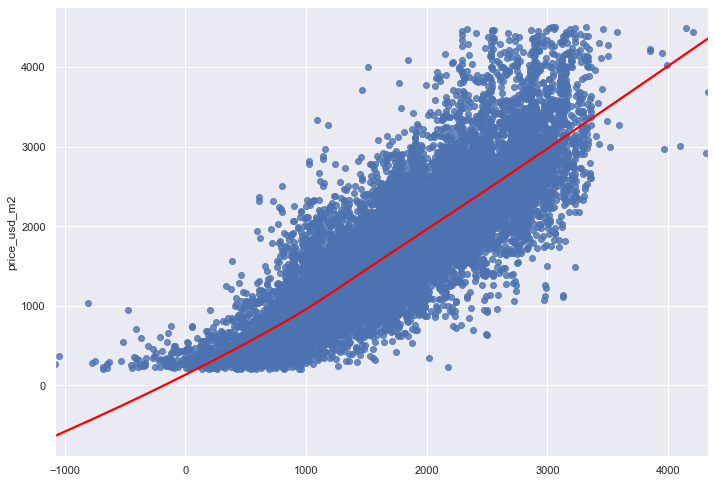

In [265]:
#Linealidad del modelo
sns.regplot(x=prediccones_con_lasso_testing, y=y_test, lowess=True, line_kws={'color': 'red'})

In [266]:
#Calculamos los residuos del modelo lasso
residuals = y_test - prediccones_con_lasso_testing

### -Normalidad de los residuos


C:\Users\s.parodi.rodriguez\AppData\Local\Continuum\anaconda5\envs\dhdsblend2021\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Jarque-Bera test ---- statistic: 1642.7586, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9813, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5384, p-value: 0.0000
Anderson-Darling test ---- statistic: 69.2966, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


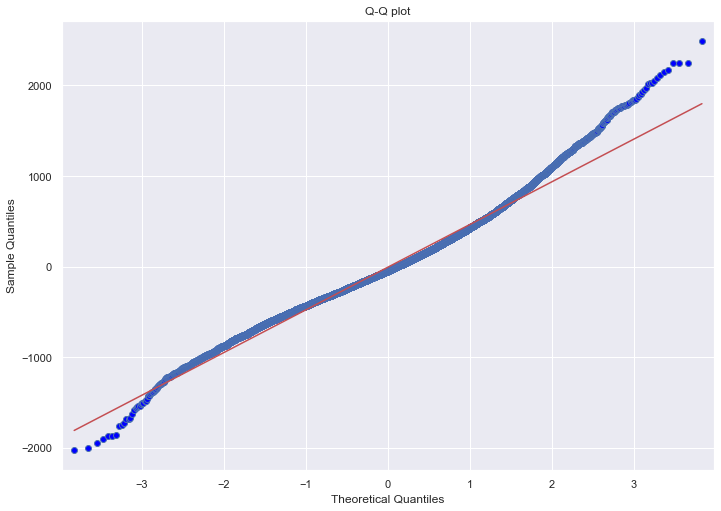

In [267]:
from scipy import stats

def normality_of_residuals_test(residuals):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(residuals).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(residuals)
    sw = stats.shapiro(residuals)
    ad = stats.anderson(residuals, dist='norm')
    ks = stats.kstest(residuals, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(residuals)

Realizamos un QQ Plot para comparar la distribución de los residuos con la distribución normal teórica 

Se puede observar como en las colas se separa los residuos de la diagonal


(-5000.0, 5000.0)

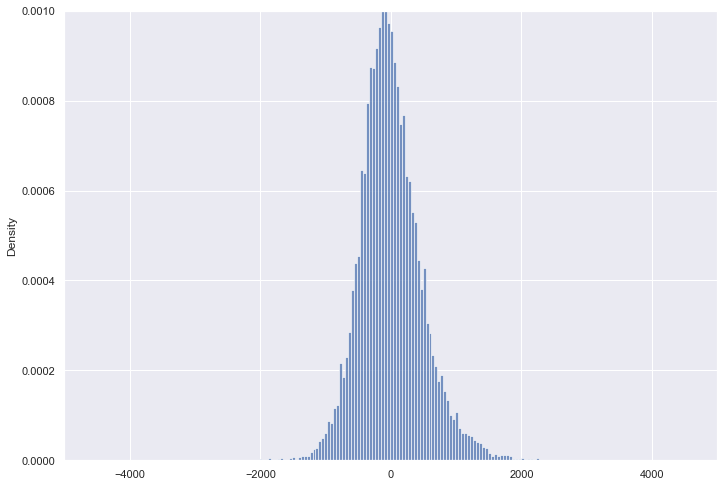

In [268]:
sns.histplot(residuals, kde = False, stat = 'density', line_kws={'linewidth':5});
plt.ylim([0,0.0010])
plt.xlim([-5000,5000])

### -Homocedasticidad (varianza igual) de residuos. Graficamos valores predichos vs residuos


<AxesSubplot:>

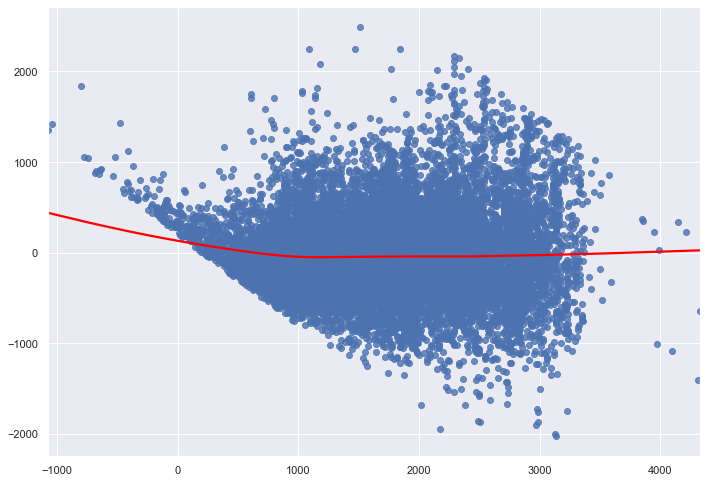

In [269]:
#Calculamos la varianza de los residuso
sns.regplot(x=prediccones_con_lasso_testing, y=residuals, lowess=True, line_kws={'color': 'red'})

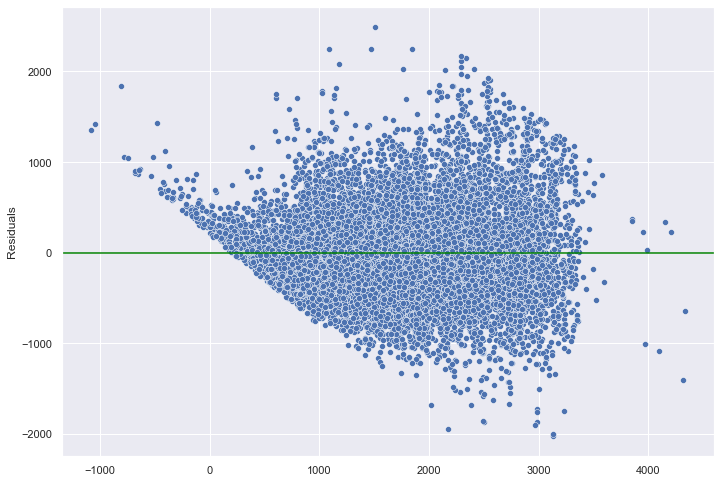

In [270]:
p = sns.scatterplot(x = prediccones_con_lasso_testing , y = residuals);
p.axhline(0, color = "green")
p.set(ylabel = "Residuals");

Encontramos dispersiones irregulares en los residuos y que la varianza no es constante (heterocedasticidad)

### Esperanza de los residuos deberia ser igual a cero

In [275]:
residuals.mean()

-3.8794997838655547

### Modelo Sk Learn (para probar con otro modelo pero no deberia cambiar mucho el r2)

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [273]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)


In [274]:
#probamos ciertas metricas en Testing 
print("TESTEO MODELO CON LIBRERIA SKT LEARN")
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

TESTEO MODELO CON LIBRERIA SKT LEARN
MAE: 359.91110825866076
MSE: 221954.70269649808
RMSE: 471.1206880370444
R2: 0.6899090801325684
